# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [3]:
!pip install -q ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import seaborn as sns
from ydata_profiling import ProfileReport

random.seed(42)
np.random.seed(42)

In [5]:
pd.set_option('display.max_colwidth', 150)

import warnings
warnings.filterwarnings("ignore")

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` Сиды фиксируем для воспроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [6]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

* Объеденим оба датасета в один, для удобства
* Добавим признак, с помощью которого можно будет их разделить обратно

In [7]:
df_train["is_test"] = 0
df_test["is_test"] = 1

In [8]:
df = pd.concat([df_train, df_test], ignore_index=True)

Разберемся в признаках

In [9]:
for col in df.columns:
    print(col.upper(), "=" * 10, df[col].unique()[:3])

NAME ========== ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Hyundai i20 Sportz Diesel']
YEAR ========== [2014 2010 2007]
SELLING_PRICE ========== [450000 370000 225000]
KM_DRIVEN ========== [145500 120000 127000]
FUEL ========== ['Diesel' 'Petrol' 'LPG']
SELLER_TYPE ========== ['Individual' 'Dealer' 'Trustmark Dealer']
TRANSMISSION ========== ['Manual' 'Automatic']
OWNER ========== ['First Owner' 'Second Owner' 'Third Owner']
MILEAGE ========== ['23.4 kmpl' '21.14 kmpl' '23.0 kmpl']
ENGINE ========== ['1248 CC' '1498 CC' '1396 CC']
MAX_POWER ========== ['74 bhp' '103.52 bhp' '90 bhp']
TORQUE ========== ['190Nm@ 2000rpm' '250Nm@ 1500-2500rpm' '22.4 kgm at 1750-2750rpm']
SEATS ========== [ 5.  4. nan]
IS_TEST ========== [0 1]


* 'name' - марка
* 'year' - год покупки/производства?
* 'selling_price' - цена на продаже
* 'km_driven' - пробег в километрах
* 'fuel' - тип топлива ('Diesel', 'Petrol', 'LPG', 'CNG')
* 'seller_type' - тип продавца ('Individual', 'Dealer', 'Trustmark Dealer')
* 'transmission' - тип передачи (ручная или механика)
* 'owner' - кол-во предыдущих владельцев машины (первый, второй, ...)
* 'mileage' - сколько машина проезжает за литр топлива
* 'engine' - тип двигателя
* 'max_power' - мощность двигателя (как я понял)
* 'torque' - крутящий момент (тоже свойство двигателя)
* 'seats' - кол-во сидений

Достаточно много дубликатов

In [10]:
df[df.duplicated()].head(3)

name  year  selling_price  km_driven  \
254                  Hyundai Grand i10 Sportz  2017         450000      35000   
258                          Maruti Swift VXI  2012         330000      50000   
324  Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000       9000   

       fuel seller_type transmission         owner    mileage   engine  \
254  Petrol  Individual       Manual   First Owner  18.9 kmpl  1197 CC   
258  Petrol  Individual       Manual  Second Owner  18.6 kmpl  1197 CC   
324  Diesel      Dealer    Automatic   First Owner  13.6 kmpl  1999 CC   

    max_power               torque  seats  is_test  
254    82 bhp       114Nm@ 4000rpm    5.0        0  
258  85.8 bhp       114Nm@ 4000rpm    5.0        0  
324   177 bhp  430Nm@ 1750-2500rpm    5.0        0

In [11]:
df[df.duplicated()].shape

(1047, 14)

Большинство дубликатов в трейне

In [12]:
df[df.duplicated()].is_test.value_counts()

is_test
0    985
1     62
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7999 non-null   object 
 1   year           7999 non-null   int64  
 2   selling_price  7999 non-null   int64  
 3   km_driven      7999 non-null   int64  
 4   fuel           7999 non-null   object 
 5   seller_type    7999 non-null   object 
 6   transmission   7999 non-null   object 
 7   owner          7999 non-null   object 
 8   mileage        7778 non-null   object 
 9   engine         7778 non-null   object 
 10  max_power      7784 non-null   object 
 11  torque         7777 non-null   object 
 12  seats          7778 non-null   float64
 13  is_test        7999 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 875.0+ KB


5 признаков с пропусками, но самих пропусков не так много

In [14]:
# 8   mileage        7778 non-null   object
# 9   engine         7778 non-null   object
# 10  max_power      7784 non-null   object
# 11  torque         7777 non-null   object
# 12  seats          7778 non-null   float64

Посмотрим на базовый анализ трейн датасета

In [15]:
profile = ProfileReport(df[df.is_test == 0], title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 20.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Выводы

Признаки mileage, max_power - как будто вещественные, но везде добавили меры измерений

In [16]:
df[["mileage", "max_power"]].head()

mileage   max_power
0   23.4 kmpl      74 bhp
1  21.14 kmpl  103.52 bhp
2   23.0 kmpl      90 bhp
3   16.1 kmpl    88.2 bhp
4  20.14 kmpl   81.86 bhp

Кол-во дубликатов в трейне по pandas

In [17]:
df.loc[(df.is_test == 0) & df.duplicated()].shape

(985, 14)

Кол-во дубликатов в трейне по ydata_profiling
* Dataset has 493 (7.0%) duplicate rows

**Дубликаты**
* Я заметил, что df.duplicated() и ProfileReport считают дубликаты по разному
* Возможно, ProfileReport их как-то группирует или считает по-другому. Я буду ориентироваться на pandas

**Пропущенные значения**
* mileage has 202 (2.9%) missing values
* engine has 202 (2.9%) missing values
* max_power has 196 (2.8%) missing values
* torque has 203 (2.9%) missing values
* seats has 202 (2.9%) missing values

**Корреляция**
* km_driven is highly correlated with year
* selling_price is highly correlated with transmission

**Selling Price**

очень длинный хвост - большинство машин недорогие, но есть небольшое множество очень дорогих машин

**KM Driven**

очень длинный хвост - большинство машин имеют небольшой пробег, но есть небольшое множество машин с большим пробегом

**Fuel, Seller Type, Transmission, Owner**

В каждом признаке есть подмножество категорий, которые встречаются максимально часто, и есть небольшое подмножество категорий, которые встречаются редко


### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

Train Numerical Statistics

In [18]:
df[df.is_test == 0].describe(exclude="object")

year  selling_price     km_driven        seats  is_test
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000   6999.0
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008      0.0
std       4.053095   8.089419e+05  5.772400e+04     0.965767      0.0
min    1983.000000   2.999900e+04  1.000000e+00     2.000000      0.0
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000      0.0
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000      0.0
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000      0.0
max    2020.000000   1.000000e+07  2.360457e+06    14.000000      0.0

Test Numerical Statistics

In [19]:
df[df.is_test == 1].describe(exclude="object")

year  selling_price      km_driven       seats  is_test
count  1000.000000   1.000000e+03    1000.000000  981.000000   1000.0
mean   2013.681000   6.179010e+05   71393.341000    5.410805      1.0
std       4.012149   7.585539e+05   48486.218662    0.919985      0.0
min    1995.000000   3.100000e+04    1303.000000    4.000000      1.0
25%    2011.000000   2.500000e+05   37000.000000    5.000000      1.0
50%    2014.000000   4.349990e+05   61500.000000    5.000000      1.0
75%    2017.000000   6.700000e+05  100000.000000    5.000000      1.0
max    2020.000000   6.000000e+06  375000.000000    9.000000      1.0

Train Categorical Statistics

In [20]:
df[df.is_test == 0].describe(include="object")

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

Test Categorical Statistics

In [21]:
df[df.is_test == 1].describe(include="object")

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

И mean, и median в трейне, больше чем в тесте - это означает, что в трейне в среднем больше дорогих машин

In [22]:
train_dsc = df[df.is_test == 0].describe(exclude="object")
test_dsc = df[df.is_test == 1].describe(exclude="object")

print("Train (mean)", train_dsc.loc["mean", "selling_price"])
print("Test (mean)", test_dsc.loc["mean", "selling_price"])
print("Train (median)", train_dsc.loc["50%", "selling_price"])
print("Test (median)", test_dsc.loc["50%", "selling_price"])

Train (mean) 639515.1971710244
Test (mean) 617901.042
Train (median) 450000.0
Test (median) 434999.0


Статистики вещественных и категориальных признаков не сильно различаются между train и тест - это хорошо. Значит тестовые данные можно будет смело использовать для замера обобщающей способности модели.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

Я думаю, что нужно искать дубликаты в объединенном датасете, чтобы в трейне и тесте не оказались одни и те же объеты, и метрики не были сильно оптимистичными

1228 объектов с одинаковым признаковым описанием

In [23]:
df_features = df.drop("selling_price", axis=1)

In [24]:
df_features[df_features.duplicated()].shape

(1228, 13)

In [25]:
df_features[df_features.duplicated()].sort_values(by="name").head(5)

name  year  km_driven    fuel  \
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017      22000  Diesel   
6704               Audi Q5 3.0 TDI Quattro  2014      76131  Diesel   
4485            Audi Q5 35TDI Premium Plus  2018      31800  Diesel   
1337            Audi Q5 35TDI Premium Plus  2018      31800  Diesel   
1595            Audi Q5 35TDI Premium Plus  2018      31800  Diesel   

     seller_type transmission        owner     mileage   engine   max_power  \
6307      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC  174.33 bhp   
6704  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   241.4 bhp   
4485      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC     188 bhp   
1337      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC     188 bhp   
1595      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC     188 bhp   

                   torque  seats  is_test  
6307  380Nm@ 1750-2500rpm    5.0        0  
6704  580Nm@ 1400-3250rpm    5.0        0  
4485  400nm@ 1750-3000rpm    5.0        0  
1337  400nm@ 1750-3000rpm    5.0        0  
1595  400nm@ 1750-3000rpm    5.0        0

In [26]:
df = df.drop_duplicates(
    subset=df_features.columns,
    keep='first'
)

In [27]:
df = df.reset_index(drop=True)

Весь датасет

In [28]:
df.shape

(6771, 14)

Только train

In [29]:
assert df[df.is_test == 0].shape == (5840, 13 + 1)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [30]:
df["mileage"] = df.mileage.apply(lambda x: float(x.split()[0]) if type(x) != float else x)

In [31]:
df["engine"] = df.engine.apply(lambda x: float(x.split()[0]) if type(x) == str else x)

In [32]:
def process_max_power(s):
    if not isinstance(s, str):
        return None
    try:
        s = float(s.split()[0])
    except:
        s = None
    return s

In [33]:
df["max_power"] = df.max_power.apply(process_max_power)

Я посмотрел различные варианты записи для torque. Нужно будет их все учесть

In [34]:
'10.2@ 2,600(kgm@ rpm)'
'100Nm@ 2700rpm'
'108.5Nm@ 5000rpm'
'11.2@ 4,400(kgm@ rpm)'
'11.4 kgm at 4,000 rpm'
'110Nm@ 3000-4300rpm'
'13.1kgm@ 4600rpm'
'14.9 KGM at 3000 RPM'

'14.9 KGM at 3000 RPM'

In [35]:
def process_torque(s):
    if not isinstance(s, str):
        return (None, None)

    s = s.lower()

    # replace all "at" with @
    s = re.sub(r"at", "@", s)

    # remove '(kgm @ rpm)'-type of substring
    s = re.sub(r"\([^)]*\)", "", s)

    parts = s.split("@")

    torque = None
    if len(parts) > 0:
        torque = parts[0]

        ratio = 1
        if "nm" in torque:
            # convert Nm to kgm
            ratio = 9.81

        # remove measures for torque (KGM, kgm)
        torque = re.sub(r"[^0-9.,]", "", torque)
        torque = float(torque) / ratio

    max_torque_rpm = None
    if len(parts) > 1:
        max_torque_rpm = parts[1]

        # remove measures for max_torque_rpm (rpm)
        max_torque_rpm = re.sub(r"[^0-9.,-]", "", max_torque_rpm)

        # if we have 1750-2500, take the maximum - 2500
        max_torque_rpm = max_torque_rpm.split("-")[-1]

        # remove commas
        max_torque_rpm = re.sub(r",", "", max_torque_rpm)
        max_torque_rpm = int(max_torque_rpm)

    return torque, max_torque_rpm


df[["torque_value", "max_torque_rpm"]] = (
    df["torque"].apply(process_torque).apply(pd.Series)
)

In [36]:
df[["mileage", "engine", "max_power", "torque", "torque_value", "max_torque_rpm"]]

mileage  engine  max_power                    torque  torque_value  \
0       23.40  1248.0      74.00            190Nm@ 2000rpm     19.367992   
1       21.14  1498.0     103.52       250Nm@ 1500-2500rpm     25.484200   
2       23.00  1396.0      90.00  22.4 kgm at 1750-2750rpm     22.400000   
3       16.10  1298.0      88.20     11.5@ 4,500(kgm@ rpm)     11.500000   
4       20.14  1197.0      81.86         113.75nm@ 4000rpm     11.595311   
...       ...     ...        ...                       ...           ...   
6766    19.81  1086.0      68.05          99.04Nm@ 4500rpm     10.095821   
6767    18.60  1197.0      81.83          114.7Nm@ 4000rpm     11.692151   
6768    23.00  1396.0      90.00  22.4 kgm at 1750-2750rpm     22.400000   
6769    20.36  1197.0      78.90          111.8Nm@ 4000rpm     11.396534   
6770    26.00  1498.0      98.60            200Nm@ 1750rpm     20.387360   

      max_torque_rpm  
0             2000.0  
1             2500.0  
2             2750.0  
3             4500.0  
4             4000.0  
...              ...  
6766          4500.0  
6767          4000.0  
6768          2750.0  
6769          4000.0  
6770          1750.0  

[6771 rows x 6 columns]

In [37]:
df.drop("torque", axis=1, inplace=True)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [38]:
cols_to_fill = ["mileage", "engine", "max_power", "seats", "torque_value", "max_torque_rpm"]

In [39]:
df.loc[df.is_test == 0, cols_to_fill].median()

mileage             19.370000
engine            1248.000000
max_power           81.860000
seats                5.000000
torque_value        16.309888
max_torque_rpm    3000.000000
dtype: float64

Используем данные из трейна для вычисления медианы

In [40]:
df = df.fillna(
    df.loc[df.is_test == 0, cols_to_fill].median()
)

Пропусков нет

In [41]:
df.isna().sum().sum()

np.int64(0)

* Для mileage еще можно было бы использовать mean, потому что распределение близко к нормальному
* Остальные распределения скошены, с большим хвостом справа. Это значит, что среднее будет сильно смещено и будет отражать меньшинство. В то время как медиана, будет более устойчивой мерой центральности.

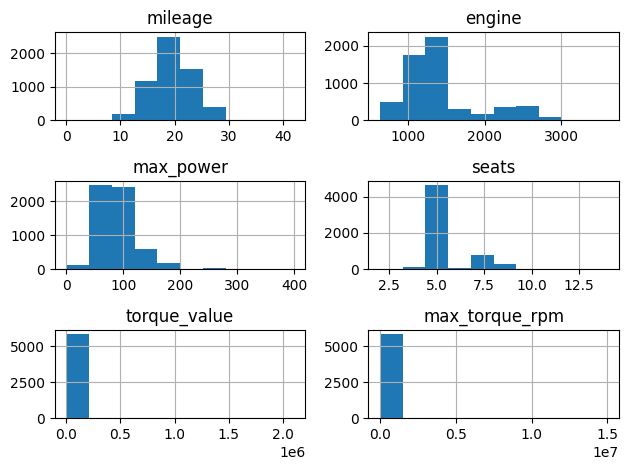

In [42]:
df.loc[df.is_test == 0, cols_to_fill].hist()
plt.tight_layout()

Как правильно считать медиану для заполнения? Выберите верное утверждение:
* По тренировочным данным для train и test

Чтобы избежать утечки данных из теста в трейн

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [43]:
df.engine = df.engine.astype(int)
df.seats = df.seats.astype(int)

In [44]:
df.seats.unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

* Seats имеет небольшое количество уникальных значений (от 2 до 14), поэтому ее можно рассматривать как категориальную

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [45]:
df.loc[df.is_test == 0].describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  is_test  torque_value  max_torque_rpm  
count  5840.000000  5840.000000   5840.0  5.840000e+03    5.840000e+03  
mean     87.906371     5.426712      0.0  2.607223e+03    8.178443e+03  
std      31.640418     0.982344      0.0  7.292557e+04    2.775922e+05  
min       0.000000     2.000000      0.0  4.800000e+00    5.000000e+02  
25%      68.000000     5.000000      0.0  1.139653e+01    2.250000e+03  
50%      81.860000     5.000000      0.0  1.630989e+01    3.000000e+03  
75%      99.000000     5.000000      0.0  2.040000e+01    4.000000e+03  
max     400.000000    14.000000      0.0  2.101900e+06    1.500450e+07

In [46]:
df.loc[df.is_test == 1].describe()

year  selling_price      km_driven     mileage       engine  \
count   931.000000   9.310000e+02     931.000000  931.000000   931.000000   
mean   2013.506982   5.501182e+05   72786.747583   19.379280  1435.484425   
std       4.043408   5.987156e+05   48823.924040    3.994487   515.908793   
min    1995.000000   3.100000e+04    1303.000000    0.000000   624.000000   
25%    2011.000000   2.500000e+05   39000.000000   16.500000  1196.500000   
50%    2014.000000   4.200000e+05   65000.000000   19.370000  1248.000000   
75%    2017.000000   6.500000e+05  100000.000000   22.320000  1498.000000   
max    2020.000000   6.000000e+06  375000.000000   32.260000  3604.000000   

        max_power       seats  is_test  torque_value  max_torque_rpm  
count  931.000000  931.000000    931.0    931.000000      931.000000  
mean    88.561837    5.409237      1.0     17.861001     3068.663802  
std     32.715854    0.924622      0.0     10.787859      876.619211  
min     34.200000    4.000000      1.0      4.892966      500.000000  
25%     68.050000    5.000000      1.0     11.213048     2500.000000  
50%     81.860000    5.000000      1.0     16.309888     3000.000000  
75%    100.000000    5.000000      1.0     20.846075     4000.000000  
max    280.000000    9.000000      1.0    145.000000     5200.000000

При заполнении пропусков медианой:
* Медиана не изменяется (50% квантиль)
* Если пропусков много, то:
    * среднее может сместиться к медиане
    * остальные квантили могут сдвинуться к центру (потому что у нас много данных в центре появится)
* Т.к. у нас пропусков было <5%, то распределение не должно сильно сдвинуться

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [47]:
df_train = df[df.is_test == 0].drop("is_test", axis=1)
df_test = df[df.is_test == 1].drop("is_test", axis=1)

In [48]:
df_train.shape, df_test.shape

((5840, 14), (931, 14))

* Чтобы не ждать 5-10 минут, пока построиться график, я решил соптимизировать:
    * Использовую 'diag_kind=kde' (быстрее, чем histplots)
    * Использую subsample из 2000 рандомных строк

* Графики ниже плохо читаемы, потоу что есть "выбросы", которые искажают график
* Я предлагаю сделать value clipping для таких значений для того, чтобы графики были менее искаженными
* Признаки для clipping: km_driven, torque_value, max_torque_rpm

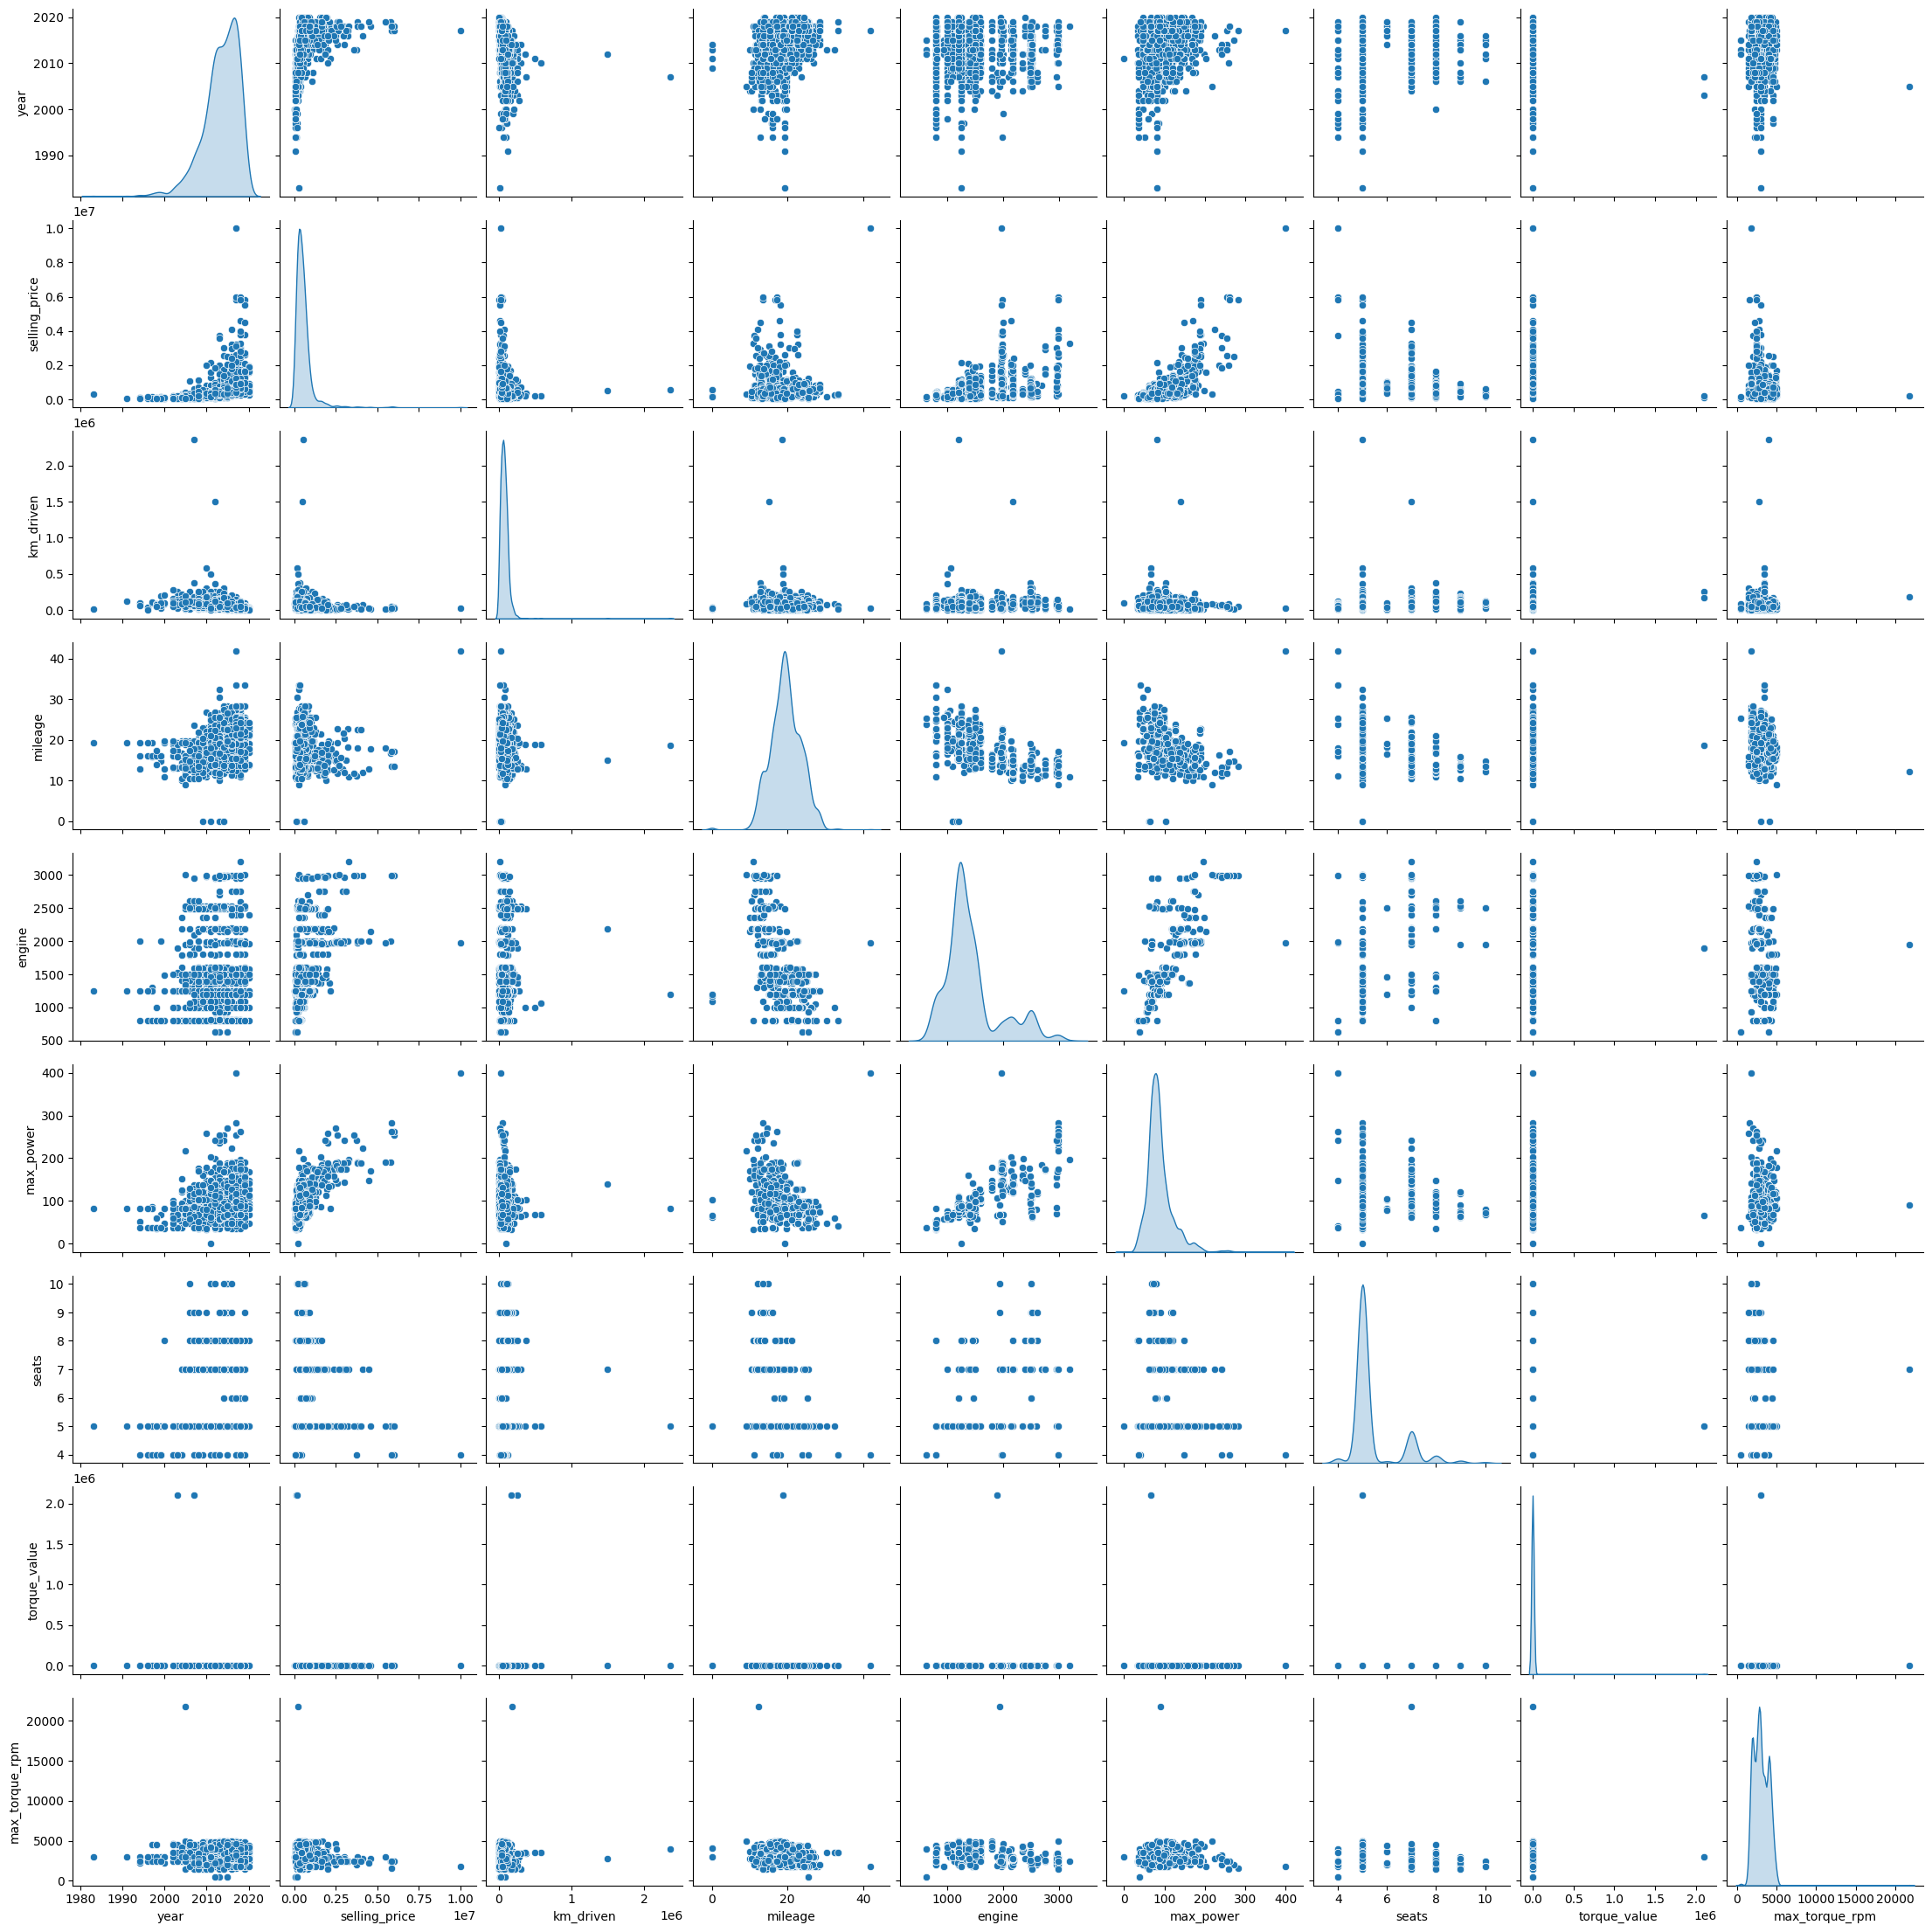

In [49]:
sns.pairplot(df_train.sample(2000), diag_kind='kde')

In [50]:
def clip_outliers_iqr(df, column, lower=None, upper=None):
    if (lower is None) and (upper is None):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower, upper)
    return df, lower, upper

In [51]:
df_train_clip = df_train.copy()
df_test_clip = df_test.copy()
for col in ["km_driven", "torque_value", "max_torque_rpm"]:
    df_train_clip, lower, upper = clip_outliers_iqr(df_train_clip, col)
    df_test_clip = clip_outliers_iqr(df_test_clip, col, lower, upper)[0]

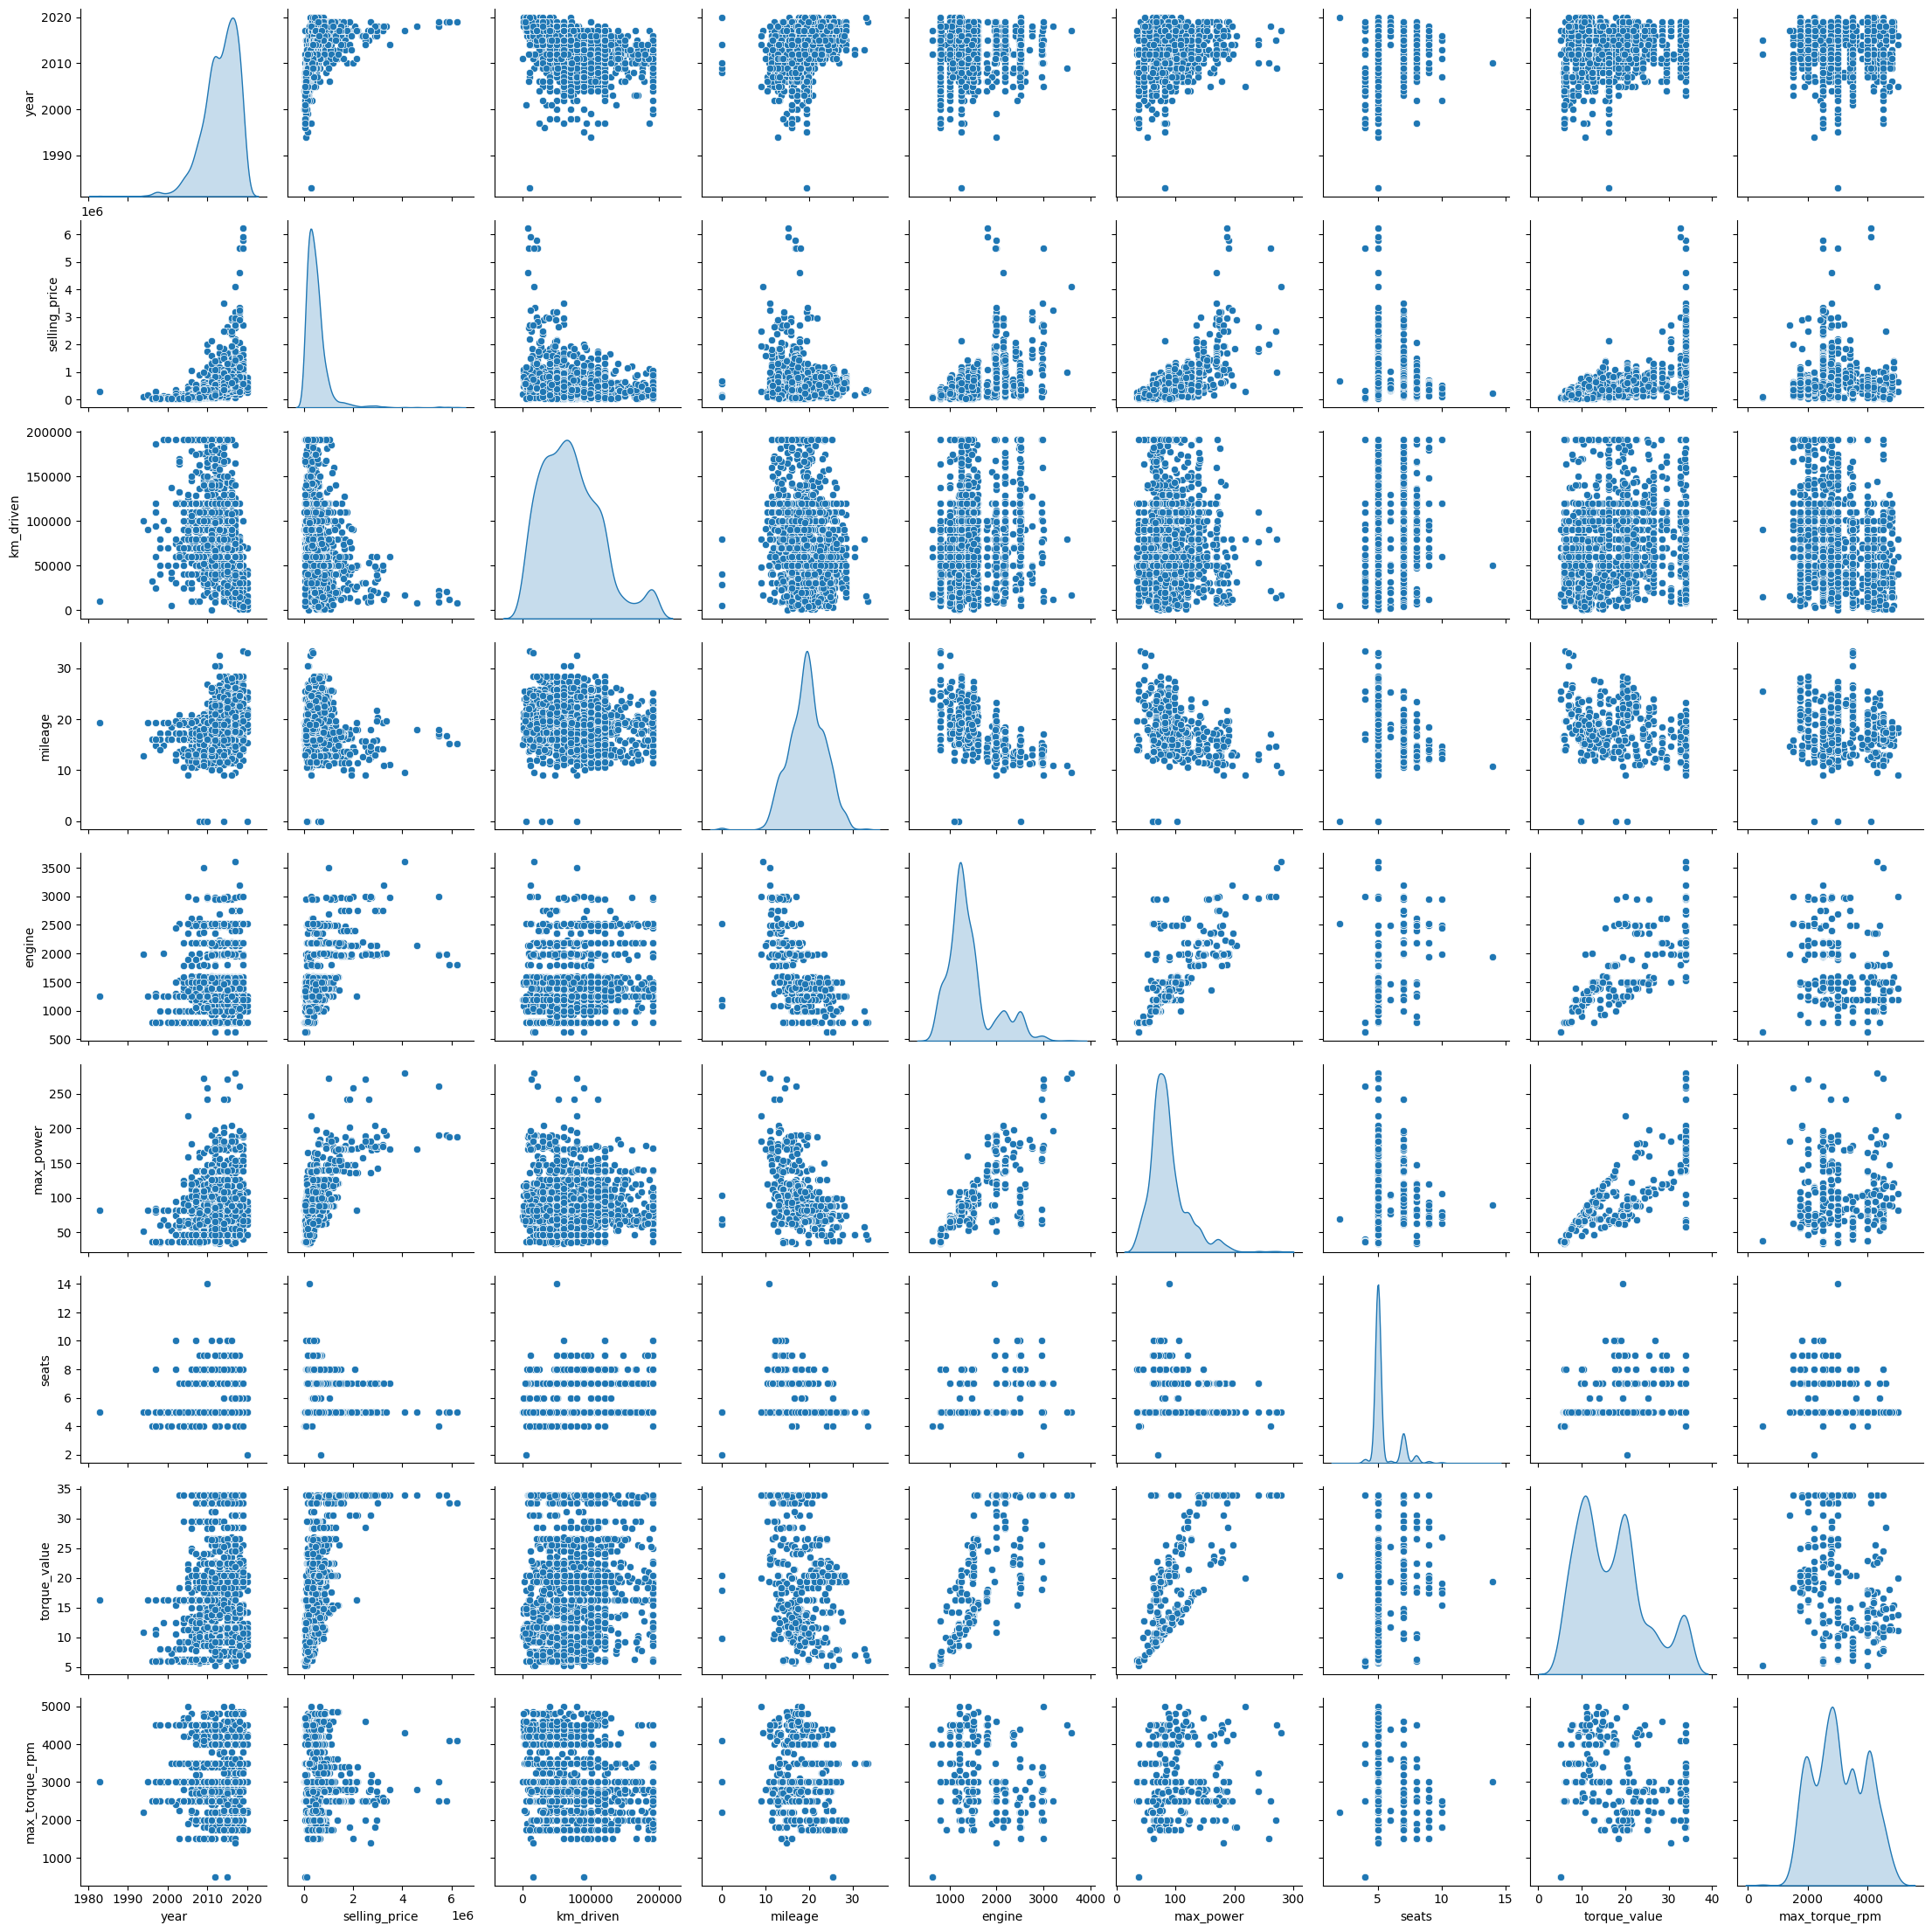

In [52]:
sns.pairplot(df_train_clip.sample(2000), diag_kind='kde')

* Можно ли предположить на основе распределений связь признаков с целевой переменной?
    
    **Более очевидные зависимости**
    * чем новее машина, тем она дороже
    * чем меньше проехано км, тем машина дороже
    * чем выше значение engine, тем машина дороже
    * чем больше max_power, тем дороже машина
    * torque - чем больше, тем машина дороже

    **Спорные зависимости**
    * seats - видно, что есть кол-во сидений, при котором все машины стоят дешевле
    * max_torque_rpm - видно, что есть некоторые значения, при которых все машины стоят дешевле
    * mileage - четкой зависимости нет
* Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
    * Из очевидных зависимостей:
        * engine & max_power
        * engine & torque_value
        * max_power & torque_value
    * В остальных случаях, если зависимости и есть, то не очень большие/явные

In [53]:
df_test_clip.shape

(931, 14)

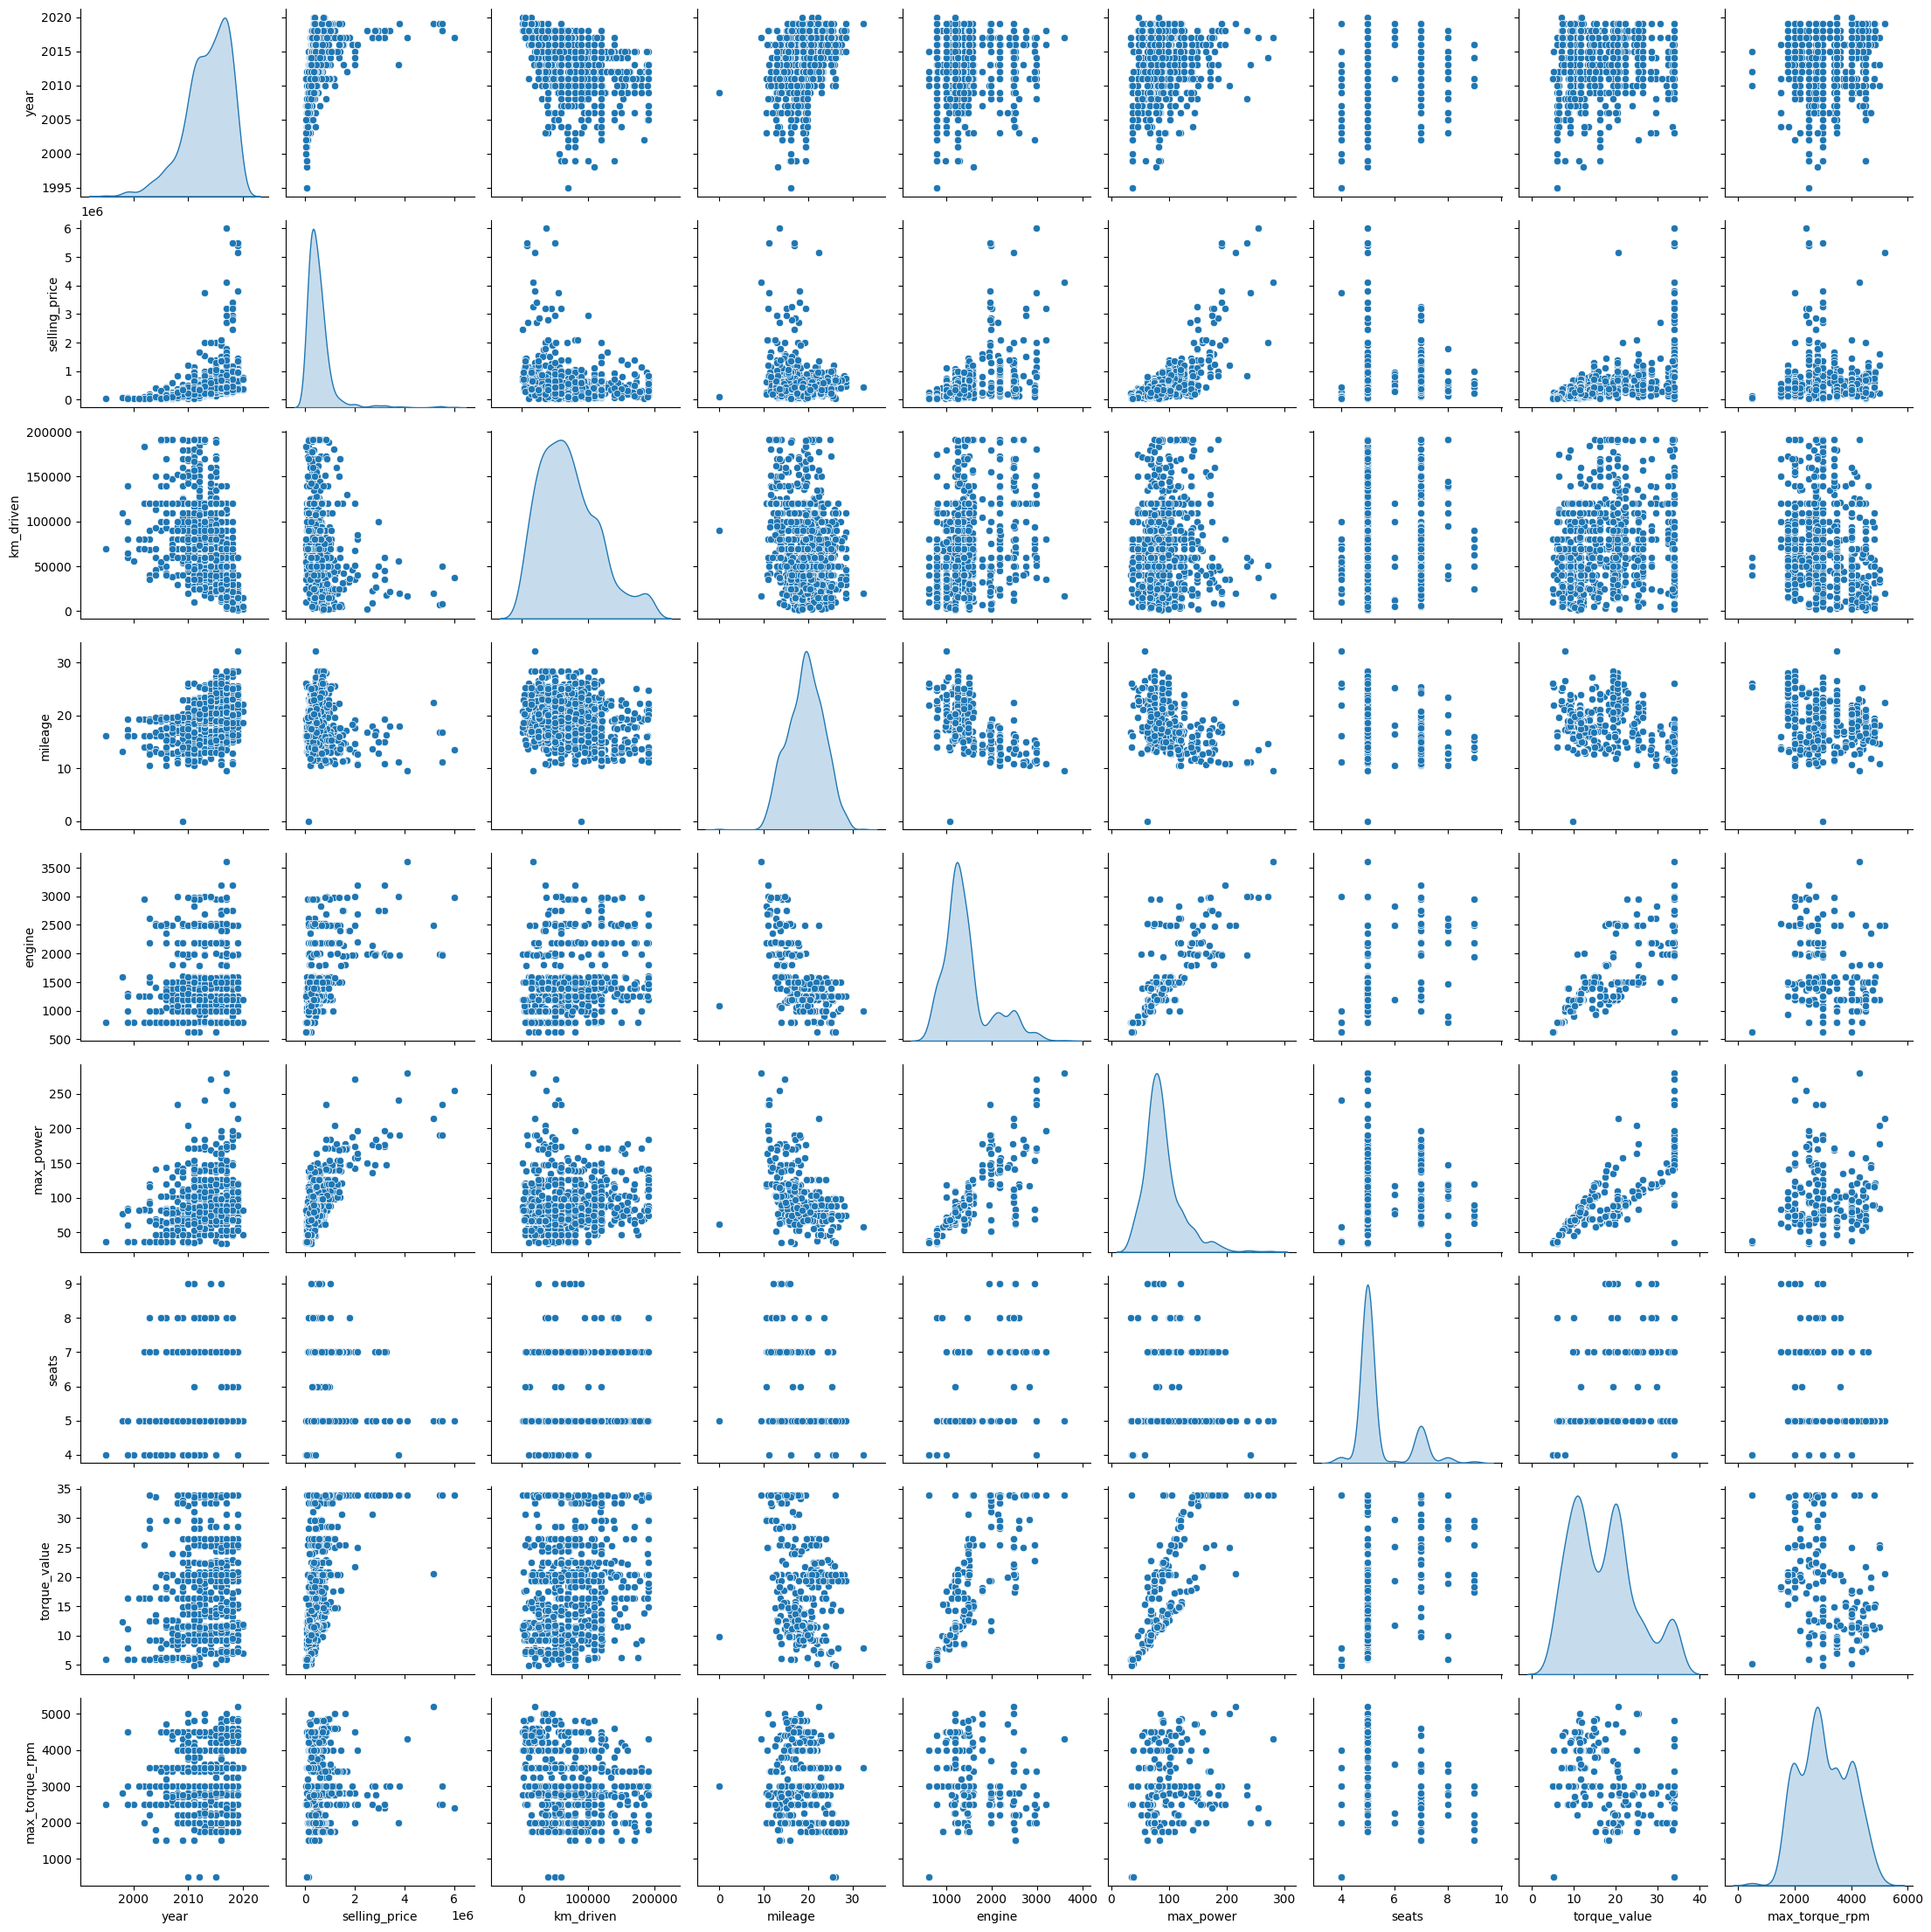

In [54]:
sns.pairplot(df_test_clip, diag_kind='kde')

"Похожими ли оказались совокупности при разделении на трейн и тест?"
* Исходя из графиков выше и ниже - да (для трейна hists выше, потому что данных больше, но сами распределения похожи)

In [55]:
num_cols = [col for col in df_train_clip.columns if df_train_clip[col].dtype != "object"]
print(num_cols)
print(len(num_cols))

['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_value', 'max_torque_rpm']
9


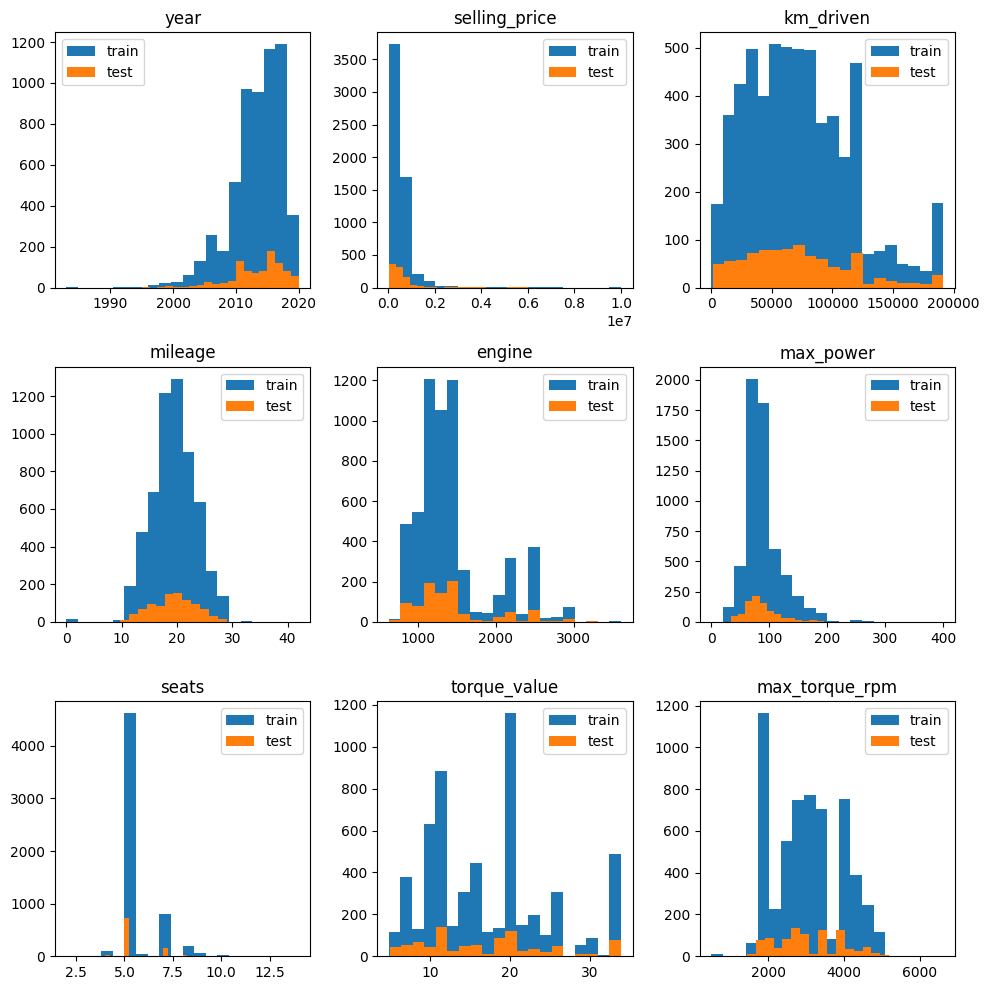

In [56]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
ax = ax.flatten()
for i, col in enumerate(num_cols):
    ax[i].hist(df_train_clip[col], label="train", bins=20)
    ax[i].hist(df_test_clip[col], label="test", bins=20)
    ax[i].set_title(col)
    ax[i].legend()
plt.tight_layout()

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

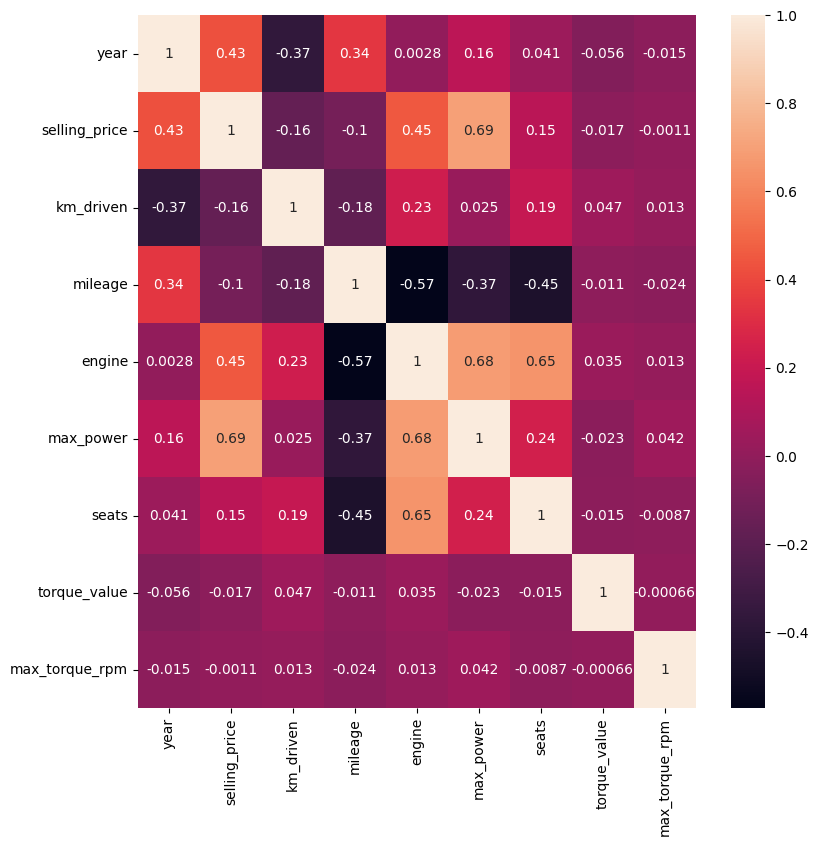

In [57]:
plt.figure(figsize=(9, 9))
sns.heatmap(df_train.corr(numeric_only=True), annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

* Какие 2 признака наименее скоррелированы между собой?
    * max_torque_rmp & torque_value (-0.00066)
* Между какими наблюдается довольно сильная положительная линейная зависимость?
    * year & selling_price (0.43)
    * year & mileage (0.34)
    * selling_price & engine (0.45)
    * selling_price & max_power (0.69)
    * engine & max_power (0.68)
    * engine & seats (0.65)
* Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
    * year & km_drivem (-0.37)
    * Ответ - да
    * Отсюда следует, что чем меньше год, тем больше километров проехала машина
    * И наоборот, чем больше год, тем меньше проехала машина
* Изучите типы корреляций в pd.corr(). Какую вы использовали по умолчанию?
    * По умолчанию выставлена корреляция Пирсона (она определена только для числовых признаков)
    * Еще есть варианты - Кендал и Спирман

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [58]:
# name, fuel, seller_type, transmission - nominal categories
num_or_ord_cols = list(set(df_train.columns)  - set(["name", "fuel", "seller_type", "transmission"]))
num_or_ord_cols

['km_driven',
 'selling_price',
 'torque_value',
 'max_torque_rpm',
 'engine',
 'year',
 'mileage',
 'seats',
 'owner',
 'max_power']

* Я полагаю, что 'owner' это порядковая категория и ее можно использовать для вычисления корреляции Спирмана
* Как будто есть естественные порядок - если машина имела одного владельца, то это лучше, чем 4+, потому что либо она старая, либо чем-то не понравилась предыдущим владельцам, и т.д.

In [59]:
df_train.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

* Для имплементации корреляции Спирмана, нужно уметь находить ранги элементов
* С помощью np.argsort можно получить индексы элементов в порядке, который обеспечивает сортировку исходного массива
* Для того, чтобы получить ранги, нужно применить argsort к индексам

In [60]:
t = np.array([55, 11, 33, 22, 44])
t

array([55, 11, 33, 22, 44])

In [61]:
np.argsort(t)

array([1, 3, 2, 4, 0])

In [62]:
np.argsort(np.argsort(t))

array([4, 0, 2, 1, 3])

In [63]:
def spearman_corr_fn(r1, r2):
    n = len(r1)
    d2 = (r1 - r2) ** 2
    nom = 6 * d2.sum()
    denom = n  * (n ** 2 - 1)
    rho = 1 - nom / denom
    return rho

def get_ranks(data):
    indices = np.argsort(data)
    ranks = np.argsort(indices)
    return ranks

def spearman_corr(df, cols):
    n = len(cols)
    corr_mtx = np.zeros((n, n))

    for i, col1 in enumerate(cols):
        ranks1 = get_ranks(df[col1].values)

        for j, col2 in enumerate(cols):
            ranks2 = get_ranks(df[col2].values)

            rho = spearman_corr_fn(ranks1, ranks2)
            corr_mtx[i][j] = rho

    return corr_mtx

<Axes: >

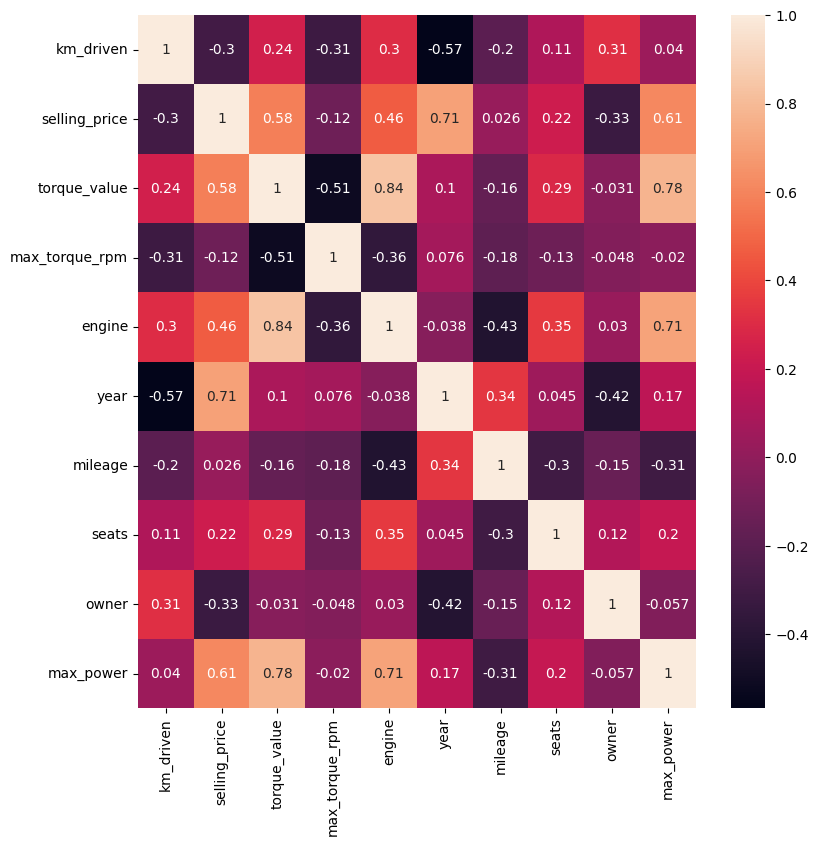

In [64]:
sp_mtx = spearman_corr(df_train, num_or_ord_cols)

plt.figure(figsize=(9, 9))
sns.heatmap(sp_mtx, annot=True, xticklabels=num_or_ord_cols, yticklabels=num_or_ord_cols)

Приведем признак 'owner' к числовому. Закодируем порядок.

In [65]:
owner_map = [
 'Test Drive Car',
 'First Owner',
 'Second Owner',
 'Third Owner',
 'Fourth & Above Owner',
]
owner_map = dict(zip(owner_map, range(len(owner_map))))

In [66]:
owner_map

{'Test Drive Car': 0,
 'First Owner': 1,
 'Second Owner': 2,
 'Third Owner': 3,
 'Fourth & Above Owner': 4}

In [67]:
df_train_spearman = df_train[num_or_ord_cols].copy()
df_train_spearman["owner"] = df_train_spearman["owner"].apply(lambda x: owner_map[x])

<Axes: >

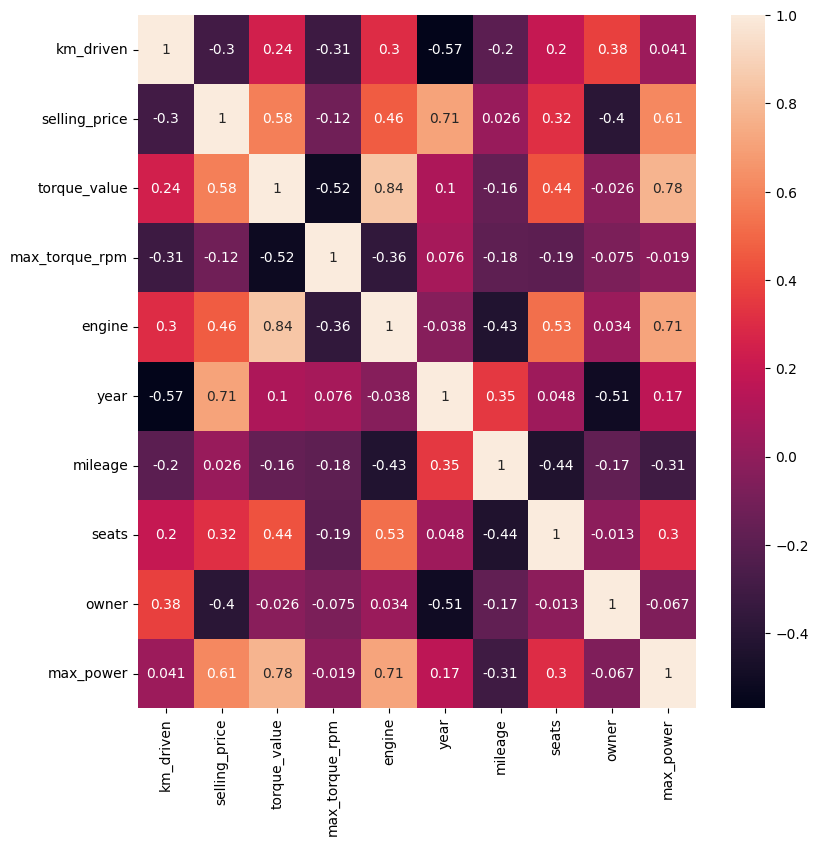

In [68]:
plt.figure(figsize=(9, 9))
sns.heatmap(df_train_spearman.corr(method="spearman"), annot=True)

* Выглядит так, как будто все значения у библиотечной реализации больше или равны значениям моей версии
* Формула, которую я использовал, будет верна, только если нет повторений ни в одном признаке. У меня это не так, отсюда - ошибка в вычислениях. Вот [ссылка на википедию](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient#Approximating_Spearman's_%CF%81_from_a_stream:~:text=all%20possible%20permutations.-,If%20ties%20are,-present%20in%20the)

In [69]:
!pip install phik

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_value', 'max_torque_rpm']


<Axes: >

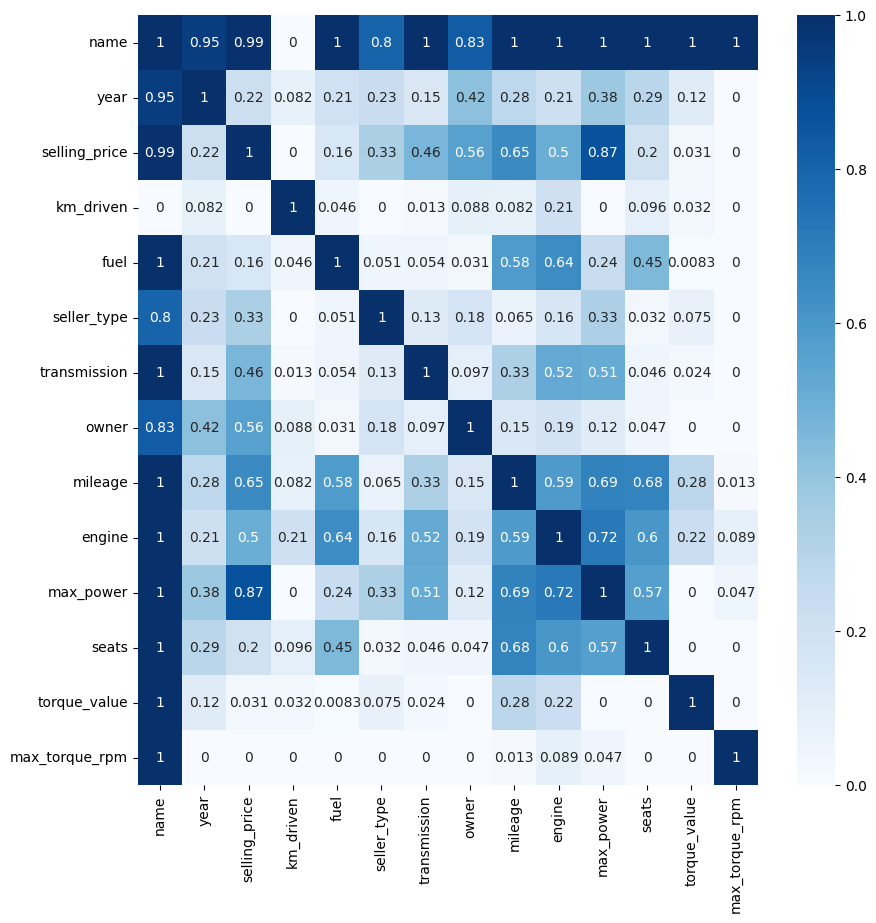

In [70]:
import phik
plt.figure(figsize=(10, 10))
ph = df_train.phik_matrix()
sns.heatmap(ph, cmap="Blues", annot=True)

* Во-первых, заметим, что 'name' сильно коррелирует со всеми признаками
    * Это может быть потому, что 'name' имеет очень много уникальных значений, своеобразный ID признак
* Признаки, которые заметно коррелируют (>0.3):
    * year & (owner, max_power)
    * selling_price & (seller_type, transmission, owner, mileage, engine, max_power)
    * fuel & (mileage, engine, seats)
    * seller_type & max_power
    * transmission & (mileage, engine, max_power)
    * mileage & (engine, max_power, seats)
    * engine & (max_power, seats)
    * max_power * seats

In [71]:
print("Shape трейна", df_train.shape)
print("Кол-во уникальных имен машин", df_train.name.nunique())

Shape трейна (5840, 14)
Кол-во уникальных имен машин 1924


### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

Выше, для сравнения распределений теста и трейна, я создал отдельный график. Я продублирую его здесь.

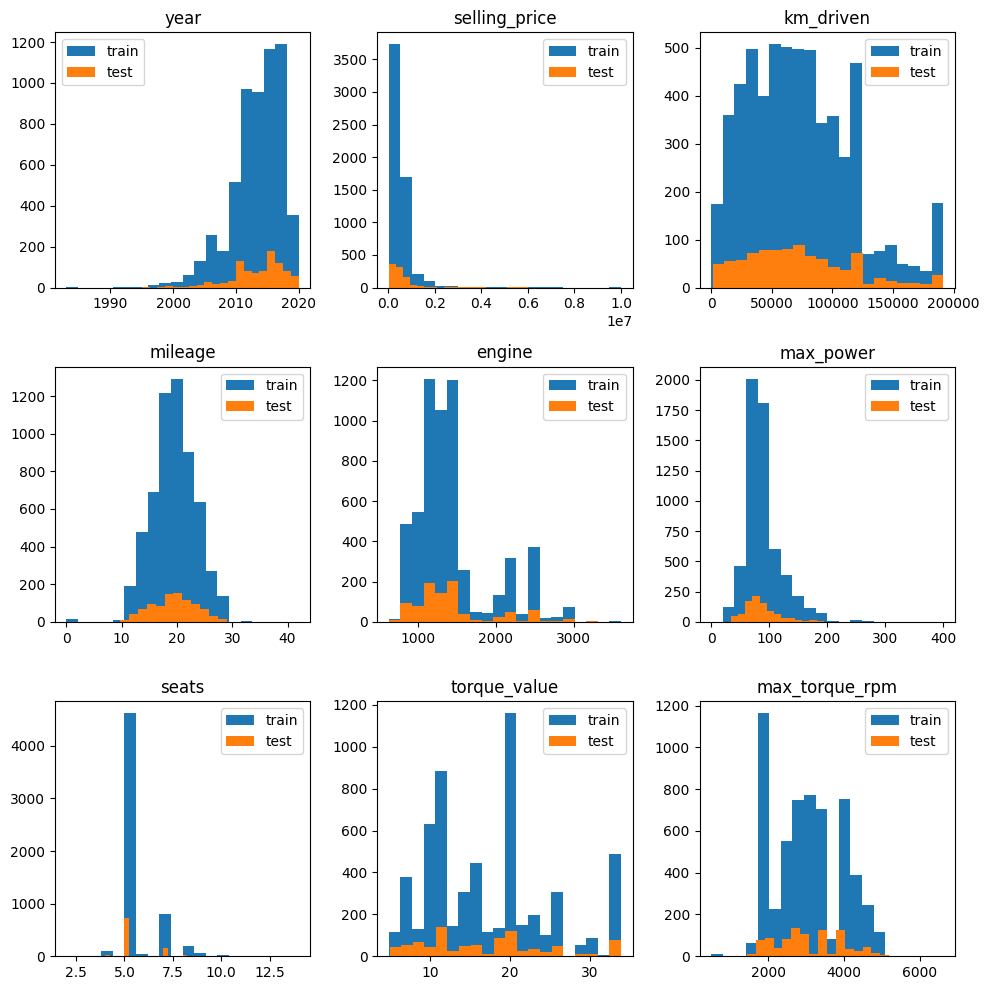

In [72]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
ax = ax.flatten()
for i, col in enumerate(num_cols):
    ax[i].hist(df_train_clip[col], label="train", bins=20)
    ax[i].hist(df_test_clip[col], label="test", bins=20)
    ax[i].set_title(col)
    ax[i].legend()
plt.tight_layout()

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [73]:
num_cols = [
    'engine',
    'max_power',
    'max_torque_rpm',
    'torque_value',
    'year',
    'seats',
    'mileage',
    'km_driven'
]

In [74]:
y_train = df_train["selling_price"]
X_train = df_train[num_cols]

In [75]:
X_train.shape, y_train.shape

((5840, 8), (5840,))

In [76]:
X_train.columns

Index(['engine', 'max_power', 'max_torque_rpm', 'torque_value', 'year',
       'seats', 'mileage', 'km_driven'],
      dtype='object')

In [77]:
y_test = df_test["selling_price"]
X_test = df_test[num_cols]

In [78]:
X_test.shape, y_test.shape

((931, 8), (931,))

In [79]:
X_test.columns

Index(['engine', 'max_power', 'max_torque_rpm', 'torque_value', 'year',
       'seats', 'mileage', 'km_driven'],
      dtype='object')

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [80]:
def print_metrics(y_true, y_pred, title=""):
    print(title)
    print(f"MSE: {MSE(y_true, y_pred):.4f}")
    print(f"RMSE: {RMSE(y_true, y_pred):.4f}")
    print(f"R2: {r2_score(y_true, y_pred):.4f}")

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE, root_mean_squared_error as RMSE

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print_metrics(y_train, pred_train, "train")
print_metrics(y_test, pred_test, "test")

train
MSE: 116696677657.5511
RMSE: 341608.9543
R2: 0.5929
test
MSE: 137592708229.9852
RMSE: 370934.9110
R2: 0.6157


* Т.к. значения MSE очень большие, я добавил RMSE для большей наглядности
* RMSE:
    * на трейне ~342k, на тесте ~371k (выглядит как переобучение)
* R2:
    * на трейне ~0.59, на тесте ~0.62 (на тесте даже лучше)

1. Разница в RMSE между трейн и тест ~29k, при том, что медиана цены ~410k. Т.e. ошибка не такая большая
2. R2 более интерпретируемый и примерно одинаковый. В трейне чуть ниже, потому что в трейне могут быть более шумные данные. К примеру, более аномальные цены (слишком дешево или слишко дорого) и т.д. Т.к. трейн больше по размеру, вероятность таких данных выше

In [82]:
df.selling_price.median()

409999.0

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

- $R^2 = 1 - \frac{sum^N_{i=1} (\hat{y_{i}} - y_i)^2}{sum^N_{i=1} (\bar{y_{i}} - y_i)^2} = 1 - \frac{MSE(\hat{y}, y)}{Var(y)}$
    - $\hat{y_{i}}$ - предсказание модели
    - $y_{i}$ - настоящее значение
    - $\bar{y_{i}}$ - среднее значение y
    - MSE - Mean Squared Error между y_true и y_pred
    - Var(y) - дисперсия y_true

- $R^2 \in (-∞, 1]$ (область значений)
    - $R^2 = 1$ - идеальная модель
    - $R^2 = 0$ - константная модель, которая предсказывает среднее y_true
    - $R^2 < 0$ - плохая модель, которая хуже константной

In [83]:
def my_r2_score(y_true, y_pred):
    rss = (y_true - y_pred) ** 2
    tss = (y_true - y_true.mean()) ** 2
    return 1 - rss.sum() / tss.sum()


Сравним с scikit-learn реализацией

In [84]:
r2_score(y_test, pred_test) == float(my_r2_score(y_test, pred_test))

True

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [85]:
def adjusted_r2_score(y_true, y_pred, p):
    n = len(y_true)
    r2 = my_r2_score(y_true, y_pred)
    adj_r2 = (1 - r2) * (n - 1) / (n - p - 1)
    return 1 - adj_r2

In [86]:
# Кол-во признаков (без учета bias)
p = len(lr.coef_)

float(adjusted_r2_score(y_test, pred_test, p))

0.6124096395163614

* Обычный $R^2$ может увеличивать при добавлении новых признаков, несмотря на то, что эти признаки могут быть неинформативны
* Adjusted $R^2$ учитывает размер выборки и кол-во параметров, чтобы нормализовать оценку. Тем самым, избежав безосновательного роста метрики

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
X_train[:2].values

array([[1.24800000e+03, 7.40000000e+01, 2.00000000e+03, 1.93679918e+01,
        2.01400000e+03, 5.00000000e+00, 2.34000000e+01, 1.45500000e+05],
       [1.49800000e+03, 1.03520000e+02, 2.50000000e+03, 2.54841998e+01,
        2.01400000e+03, 5.00000000e+00, 2.11400000e+01, 1.20000000e+05]])

In [89]:
X_train_scaled[:2]

array([[-0.37364298, -0.43955049, -0.02225917, -0.03548929,  0.13956959,
        -0.43441899,  0.995867  ,  1.19115249],
       [ 0.14116151,  0.49351327, -0.02045781, -0.03540541,  0.13956959,
        -0.43441899,  0.42883018,  0.76661943]])

In [90]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_metrics(y_train, pred_train, "train")
print_metrics(y_test, pred_test, "test")

train
MSE: 116696677657.5512
RMSE: 341608.9543
R2: 0.5929
test
MSE: 137592708229.9982
RMSE: 370934.9110
R2: 0.6157


In [91]:
# Метрики раньше
# train
# MSE: 116696677657.5511
# RMSE: 341608.9543
# R2: 0.5929
# test
# MSE: 137592708229.9852
# RMSE: 370934.9110
# R2: 0.6157

Почти ничего не изменилось

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [92]:
coefs = zip(
    list(lr.coef_),
    range(len(lr.coef_))
)
coefs = sorted(coefs, key=lambda x: abs(x[0]), reverse=True)
for i, (coef, idx) in enumerate(coefs):
    print(f"Feature {X_train.columns[idx]}, Importance: {i}, Importance Value: {coef}")

Feature max_power, Importance: 0, Importance Value: 324299.6213976941
Feature year, Importance: 1, Importance Value: 152860.15564936062
Feature engine, Importance: 2, Importance Value: 59496.63113614757
Feature km_driven, Importance: 3, Importance Value: -44113.41489855408
Feature mileage, Importance: 4, Importance Value: 28439.32370753237
Feature seats, Importance: 5, Importance Value: -22666.481475084496
Feature max_torque_rpm, Importance: 6, Importance Value: -11622.924267975275
Feature torque_value, Importance: 7, Importance Value: 6592.2984526335895


Наиболее информативный признак - max_power

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [93]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

pred_train = lasso.predict(X_train_scaled)
pred_test = lasso.predict(X_test_scaled)

print_metrics(y_train, pred_train, "train")
print_metrics(y_test, pred_test, "test")

train
MSE: 116696677669.1650
RMSE: 341608.9543
R2: 0.5929
test
MSE: 137592879225.7595
RMSE: 370935.1415
R2: 0.6157


Lasso чуть хуже, чем обычная Liner Regression. Но разница в очень маленькая

In [94]:
# Linear Regression Metrics
# train
# MSE: 116696677657.5512
# RMSE: 341608.9543
# R2: 0.5929
# test
# MSE: 137275908229.9982
# RMSE: 370934.9110
# R2: 0.6157

Сравним веса Linear Regression и Lasso
* Веса по модулю стали чуть-чуть поменьше

In [95]:
lr.coef_

array([ 59496.63113615, 324299.62139769, -11622.92426798,   6592.29845263,
       152860.15564936, -22666.48147508,  28439.32370753, -44113.41489855])

In [96]:
lasso.coef_

array([ 59492.07728867, 324300.33793928, -11621.93101366,   6591.43176887,
       152859.90838718, -22663.68175632,  28437.54264439, -44112.31236261])

Увеличим коэффициент регуляризации
* Т.к. MSE по модулю огромный, то alpha нужен большой, прежде чем регуляризация будет вносить заметный вклад в общий лосс
* Если мы увеличиваем alpha, то веса становятся меньше по модулю и метрики становятся также хуже
* Т.к. мы нормализовали данные, а цена на машины измеряется в сотнях тысяч, в линейной модели веса должны быть большими. Поэтому уменьшение весов по модулю может делать хуже
* Все веса большие по модулю, значит все признаки нужны

In [97]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=500.0)
lasso.fit(X_train_scaled, y_train)

pred_train = lasso.predict(X_train_scaled)
pred_test = lasso.predict(X_test_scaled)

print_metrics(y_train, pred_train, "train")
print_metrics(y_test, pred_test, "test")

train
MSE: 116699533782.7443
RMSE: 341613.1347
R2: 0.5929
test
MSE: 137680379544.9145
RMSE: 371053.0684
R2: 0.6155


In [98]:
lasso.coef_

array([ 57259.82409861, 324637.79544153, -11125.99020095,   6157.1958794 ,
       152738.20291153, -21285.58555333,  27554.65718238, -43565.45771594])

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [99]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=42)
param_grid = {
    "alpha": [0, 500, 5000, 10000, 20000, 35000],
}

* alpha - коэффициент, на который умножается L1 регуляризация при добавлении в общий лосс
$$Loss = MSE + \alpha * L1$$

In [100]:
clf = GridSearchCV(
    lasso,
    param_grid,
    scoring="r2",
    cv=10,
    n_jobs=-1,
)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0, 500, 5000, 10000, 20000, 35000]},
             scoring='r2')

In [101]:
lasso_best = clf.best_estimator_
print("Best params", clf.best_params_)
mean_score = clf.cv_results_["mean_test_score"][clf.best_index_]
std_score = clf.cv_results_["std_test_score"][clf.best_index_]
print(f"Score: {mean_score:.4f} +- {std_score:.4f}")

Best params {'alpha': 20000}
Score: 0.5745 +- 0.0483


In [102]:
y_train_pred = lasso_best.predict(X_train_scaled)
y_test_pred = lasso_best.predict(X_test_scaled)

print_metrics(y_train, y_train_pred, "train")
print_metrics(y_test, y_test_pred, "test")

train
MSE: 118904547801.5898
RMSE: 344825.3874
R2: 0.5852
test
MSE: 142528131603.7368
RMSE: 377528.9811
R2: 0.6020


Веса 4-х признаков занулились:
* max_torque_rpm
* torque_value
* seats
* mileage

In [103]:
coefs = zip(
    list(lasso_best.coef_),
    range(len(lasso_best.coef_))
)
coefs = sorted(coefs, key=lambda x: abs(x[0]), reverse=True)
for i, (coef, idx) in enumerate(coefs):
    print(f"Feature {X_train.columns[idx]}, Importance: {i}, Importance Value: {coef}")

Feature max_power, Importance: 0, Importance Value: 326985.8600081491
Feature year, Importance: 1, Importance Value: 149549.50300036042
Feature km_driven, Importance: 2, Importance Value: -21447.685237845122
Feature engine, Importance: 3, Importance Value: 1478.189338076222
Feature max_torque_rpm, Importance: 4, Importance Value: -0.0
Feature torque_value, Importance: 5, Importance Value: 0.0
Feature seats, Importance: 6, Importance Value: -0.0
Feature mileage, Importance: 7, Importance Value: 0.0


* GridSearchCV обучал N моделей:
$$N = N_{p1} \times N_{folds} = 50$$
$N_{p1} = 5$ - кол-во вариантов для параметра alpha, $N_{folds} = 10$ - кол-во фолдов

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [104]:
elastic = ElasticNet(random_state=42)
param_grid = {
    "alpha": [0, 5000, 10000, 20000, 35000],
    "l1_ratio": [0, 0.25, 0.5, 0.75, 1.0],
}

* l1_ratio
    * l1_ratio = 0, L2 регуляризация
    * l1_ratio = 1, L1 регуляризация

    * l1_ratio in (0, 1), линейная комбинация между L1 и L2, с коэффициентом lr_ratio
* alpha - коэффициент, на который умножается линейная комбинации регуляризаций выше и добавляется в общий лосс
$$Loss = MSE + \alpha * (l1\_ratio * L1 + (1 - l1\_ratio) * L2)$$

In [105]:
clf = GridSearchCV(
    elastic,
    param_grid,
    scoring="r2",
    cv=10,
    n_jobs=-1,
)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0, 5000, 10000, 20000, 35000],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1.0]},
             scoring='r2')

* GridSearchCV обучал N моделей:
$$N = N_{p1} \times N_{p2} \times N_{folds} = 250$$
$N_{p1} = N_{p2} = 5$ - кол-во вариантов для параметров alpha и l1_ratio, $N_{folds} = 10$ - кол-во фолдов

* При оптимальных параметрах ElasticNet становится Lasso

In [106]:
elastic_best = clf.best_estimator_
print("Best params", clf.best_params_)
mean_score = clf.cv_results_["mean_test_score"][clf.best_index_]
std_score = clf.cv_results_["std_test_score"][clf.best_index_]
print(f"Score: {mean_score:.4f} +- {std_score:.4f}")

Best params {'alpha': 20000, 'l1_ratio': 1.0}
Score: 0.5745 +- 0.0483


In [107]:
y_train_pred = elastic_best.predict(X_train_scaled)
y_test_pred = elastic_best.predict(X_test_scaled)

print_metrics(y_train, y_train_pred, "train")
print_metrics(y_test, y_test_pred, "test")

train
MSE: 118904547801.5898
RMSE: 344825.3874
R2: 0.5852
test
MSE: 142528131603.7368
RMSE: 377528.9811
R2: 0.6020


Те же признаки занулились, соответственно

In [108]:
coefs = zip(
    list(elastic_best.coef_),
    range(len(elastic_best.coef_))
)
coefs = sorted(coefs, key=lambda x: abs(x[0]), reverse=True)
for i, (coef, idx) in enumerate(coefs):
    print(f"Feature {X_train.columns[idx]}, Importance: {i}, Importance Value: {coef}")

Feature max_power, Importance: 0, Importance Value: 326985.8600081491
Feature year, Importance: 1, Importance Value: 149549.50300036042
Feature km_driven, Importance: 2, Importance Value: -21447.685237845122
Feature engine, Importance: 3, Importance Value: 1478.189338076222
Feature max_torque_rpm, Importance: 4, Importance Value: -0.0
Feature torque_value, Importance: 5, Importance Value: 0.0
Feature seats, Importance: 6, Importance Value: -0.0
Feature mileage, Importance: 7, Importance Value: 0.0


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

Все категориальные признаки

In [109]:
cat_cols = list(set(df_train.columns) - set(X_train.columns))
cat_cols.remove("selling_price")
cat_cols

['name', 'fuel', 'seller_type', 'transmission', 'owner']

Кол-во уникальных значений

In [110]:
df.name.nunique()

2045

Сейчас заметил, что в объединенном датасете, кол-во уникальных значений для name = 2045, в то время как для трейна - 1924. Значит в тесте есть названия, которых нет в трейне - нужно будет обработать

In [111]:
def check_cat_diff(train, test, cat):
    cat_diff = set(test[cat].unique()) - set(train[cat].unique())
    print("Признак", cat)
    print("Кол-во новых значений в тесте, которых нет в трейне:", len(cat_diff))
    print("Примеры", list(cat_diff)[:3])

Посмотрим на все признаки. Проблемы только в name

In [112]:
for col in cat_cols:
    check_cat_diff(df_train, df_test, col)
    print()

Признак name
Кол-во новых значений в тесте, которых нет в трейне: 121
Примеры ['Maruti Baleno Alpha CVT', 'Hyundai Accent GLX', 'Tata Sumo EX BS IV']

Признак fuel
Кол-во новых значений в тесте, которых нет в трейне: 0
Примеры []

Признак seller_type
Кол-во новых значений в тесте, которых нет в трейне: 0
Примеры []

Признак transmission
Кол-во новых значений в тесте, которых нет в трейне: 0
Примеры []

Признак owner
Кол-во новых значений в тесте, которых нет в трейне: 0
Примеры []




Примеры name

In [113]:
df.name.sample(5)

4856                     Maruti SX4 VDI
3159      Ford Fiesta 1.5 TDCi Titanium
6650    Tata Zest Quadrajet 1.3 75PS XE
2120                  Maruti Ertiga VDI
3843              Tata Safari Storme LX
Name: name, dtype: object

Можем взять первые три слова в названии машины и разбить на три новых признака:
* maker - производитель машины
* model: название модель машины
* variant: спецификация машины - тип двигателя, тип кузова и т.д

Дообработка variant:
* Почистим от ненужных значений
* Все значения, которые встречаются редко заменим на 'other'.

In [114]:
def process_name(s, process_variant=True):
    maker, model, *variant = s.lower().split()
    variant = " ".join(variant) if variant else ""

    if not process_variant:
        return maker, model, variant

    # Remove fuel types (we have 'fuel' feature)
    for w in ['diesel', 'petrol', 'lpg', 'cng']:
        variant = variant.replace(w, "")

    # Remove transmission types (we have 'transmission' feature)
    for w in ["mt", "at"]:
        variant = variant.replace(w, "")

    # Remove year ranges (we have 'year' feature)
    variant = re.sub(r"[0-9]+-[0-9]+\s*", "", variant)

    # Remove decimal numbers
    variant = re.sub(r"[0-9]+\.[0-9]+\s*", "", variant)

    # Remove parentheses
    variant = re.sub(r"[\(\)]", "", variant)

    variant = " ".join(variant.split())

    return maker, model, variant

Наивный подход без чистки variant

In [115]:
df_train[["maker", "model", "variant"]] = df_train.name.apply(process_name, process_variant=False).apply(pd.Series)
df_test[["maker", "model", "variant"]] = df_test.name.apply(process_name, process_variant=False).apply(pd.Series)

Результат

In [116]:
df_train[["name", "maker", "model", "variant"]].head()

name    maker  model           variant
0         Maruti Swift Dzire VDI   maruti  swift         dzire vdi
1   Skoda Rapid 1.5 TDI Ambition    skoda  rapid  1.5 tdi ambition
2      Hyundai i20 Sportz Diesel  hyundai    i20     sportz diesel
3         Maruti Swift VXI BSIII   maruti  swift         vxi bsiii
4  Hyundai Xcent 1.2 VTVT E Plus  hyundai  xcent   1.2 vtvt e plus

Кол-во уникалльных значений variant в train

In [117]:
df_train.variant.nunique()

1760

In [118]:
for col in ["maker", "model", "variant"]:
    check_cat_diff(df_train, df_test, col)
    print()

Признак maker
Кол-во новых значений в тесте, которых нет в трейне: 2
Примеры ['opel', 'ashok']

Признак model
Кол-во новых значений в тесте, которых нет в трейне: 5
Примеры ['x5', 'xc60', 'leyland']

Признак variant
Кол-во новых значений в тесте, которых нет в трейне: 108
Примеры ['r ax minor', 'at', 'xxi abs (petrol)']



Подход с чисткой variant

In [119]:
df_train[["maker", "model", "variant"]] = df_train.name.apply(process_name).apply(pd.Series)
df_test[["maker", "model", "variant"]] = df_test.name.apply(process_name).apply(pd.Series)

In [120]:
df_train[["name", "maker", "model", "variant"]].head()

name    maker  model       variant
0         Maruti Swift Dzire VDI   maruti  swift     dzire vdi
1   Skoda Rapid 1.5 TDI Ambition    skoda  rapid  tdi ambition
2      Hyundai i20 Sportz Diesel  hyundai    i20        sportz
3         Maruti Swift VXI BSIII   maruti  swift     vxi bsiii
4  Hyundai Xcent 1.2 VTVT E Plus  hyundai  xcent   vtvt e plus

Гораздо меньше уникальных значений. Было - 1760, стало 1399

In [121]:
df_train.variant.nunique()

1399

Было 108, стало 74

In [122]:
for col in ["maker", "model", "variant"]:
    check_cat_diff(df_train, df_test, col)
    print()

Признак maker
Кол-во новых значений в тесте, которых нет в трейне: 2
Примеры ['opel', 'ashok']

Признак model
Кол-во новых значений в тесте, которых нет в трейне: 5
Примеры ['x5', 'xc60', 'leyland']

Признак variant
Кол-во новых значений в тесте, которых нет в трейне: 74
Примеры ['r ax minor', 'le', 'xing xs erlx euro ii']



Добавим значение "other" для каждого из новых признаков, т.к.
* в каждом есть разногласия с тестом
* в каждом много уникальных значений, возьмем топ-N, остальные - "other"

In [123]:
def get_top_values(train, col, top=50):
    return list(train[col].value_counts()[:top].index)

Процессим трейн и тест. Статистики считаем по трейну

In [124]:
top_maker = get_top_values(df_train, "maker", 50)
top_model = get_top_values(df_train, "model", 50)
top_variant = get_top_values(df_train, "variant", 50)

Примеры

In [125]:
top_maker[:5]

['maruti', 'hyundai', 'mahindra', 'tata', 'toyota']

In [126]:
top_model[:5]

['swift', 'alto', 'i20', 'wagon', 'innova']

In [127]:
top_variant[:5]

['vdi', 'dzire vdi', 'lxi', 'vxi', '800 lxi']

In [128]:
def process_with_other(train, test, col, allowed_values):
    train[col] = train[col].apply(lambda x: x if x in allowed_values else "other")
    test[col] = test[col].apply(lambda x: x if x in allowed_values else "other")
    return train, test

In [129]:
df_train, df_test = process_with_other(df_train, df_test, "maker", top_maker)
df_train, df_test = process_with_other(df_train, df_test, "model", top_model)
df_train, df_test = process_with_other(df_train, df_test, "variant", top_variant)

Результат

In [130]:
for col in ["maker", "model", "variant"]:
    check_cat_diff(df_train, df_test, col)
    print()

Признак maker
Кол-во новых значений в тесте, которых нет в трейне: 1
Примеры ['other']

Признак model
Кол-во новых значений в тесте, которых нет в трейне: 0
Примеры []

Признак variant
Кол-во новых значений в тесте, которых нет в трейне: 0
Примеры []



In [131]:
for col in ["maker", "model", "variant"]:
    print(col, df_train[col].nunique())

maker 30
model 51
variant 51


In [132]:
df_train.drop("name", axis=1, inplace=True)
df_test.drop("name", axis=1, inplace=True)

In [133]:
X_train_cat = pd.concat([X_train, df_train[["maker", "model", "variant"]]], axis=1)
X_test_cat = pd.concat([X_test, df_test[["maker", "model", "variant"]]], axis=1)

In [134]:
X_train.shape, X_train_cat.shape

((5840, 8), (5840, 11))

In [135]:
X_train_cat.describe(include='object')

maker  model variant
count     5840   5840    5840
unique      30     51      51
top     maruti  other   other
freq      1804   1101    3919

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [136]:
cat_cols = [
    'owner', 'fuel', "maker", "model",
    "variant", 'seller_type', 'transmission'
]

In [137]:
cat_cols_and_seats = cat_cols + ['seats']

In [138]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', drop="first")
ohe.fit(df_train[cat_cols_and_seats])

df_train_cat_ohe = ohe.transform(df_train[cat_cols_and_seats])
df_test_cat_ohe = ohe.transform(df_test[cat_cols_and_seats])

In [139]:
df_train_cat_ohe.shape

(5840, 147)

In [140]:
cat_cols_and_seats

['owner',
 'fuel',
 'maker',
 'model',
 'variant',
 'seller_type',
 'transmission',
 'seats']

In [141]:
X_train_cat.drop(["maker", "model", "variant", "seats"], axis=1, inplace=True)
X_test_cat.drop(["maker", "model", "variant", "seats"], axis=1, inplace=True)

In [142]:
df_train_cat_ohe = pd.DataFrame(df_train_cat_ohe.toarray(), columns=ohe.get_feature_names_out())
df_test_cat_ohe = pd.DataFrame(df_test_cat_ohe.toarray(), columns=ohe.get_feature_names_out())

In [143]:
X_train_cat.shape

(5840, 7)

In [144]:
df_train_cat_ohe.shape

(5840, 147)

In [145]:
X_train_cat = pd.concat([X_train_cat.reset_index(drop=True), df_train_cat_ohe], axis=1)
X_test_cat = pd.concat([X_test_cat.reset_index(drop=True), df_test_cat_ohe], axis=1)

In [146]:
X_train_cat.shape, X_test_cat.shape

((5840, 154), (931, 154))

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
    * Если признак имеет N уникальных значений, то OHE создаст N новых признаков.
        * N может быть очень большим, что можешь привести к большой матрице данных и большим вычислительным ресурсам.
        * Также, большое количество признаков может создать проблемы для модели. Т.к. пространство признаков/параметров/данных увеличивается, может быть сложнее найти оптимальное решение.
    * OHE оценивается по трейн данным, и затем применяется к трейн и тест данным.
    * Если есть новые категории, они кодируеются как нулями (handle_unknown='ignore')
* Почему мы удаляем один столбец?
    * Пусть у нас OHE создал три признака, и мы знаем, что два из них равны 0. Тогда мы точно знаем, что оставшийся равен 1. Т.е. зная (n-1) значений, можно вывести последнее значение. Эта линейная зависимость особо вредна для линейных моделей, потому что матрица данных становится вырожденной.
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?
    * Если эти признаки не нужны модели (не имеют предсказательной силы), то их можно удалить. Удалить нужно из трейна и теста одновременно.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [147]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge(random_state=42)
param_grid = {
    "alpha": [0, 5000, 10000, 20000, 35000],
}

In [148]:
clf = GridSearchCV(
    ridge,
    param_grid,
    scoring="r2",
    cv=10,
    n_jobs=-1,
)
clf.fit(X_train_cat, y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0, 5000, 10000, 20000, 35000]},
             scoring='r2')

In [149]:
ridge_best = clf.best_estimator_
print("Best params", clf.best_params_)
mean_score = clf.cv_results_["mean_test_score"][clf.best_index_]
std_score = clf.cv_results_["std_test_score"][clf.best_index_]
print(f"Score: {mean_score:.4f} +- {std_score:.4f}")

Best params {'alpha': 5000}
Score: 0.5817 +- 0.0720


In [150]:
y_train_pred = ridge_best.predict(X_train_cat)
y_test_pred = ridge_best.predict(X_test_cat)

print_metrics(y_train, y_train_pred, "train")
print_metrics(y_test, y_test_pred, "test")

train
MSE: 112623987158.9753
RMSE: 335594.9749
R2: 0.6071
test
MSE: 133057105278.3213
RMSE: 364769.9347
R2: 0.6284


С добавлением категориальных признаков качество заметно улучшилось

| model | features | r2 |
| --- | --- | --- |
| Linear Regression | numerical| 0.6157 |
| Linear Regression | scaled numerical | 0.6157 |
| Lasso | scaled numerical | 0.6157 |
| Lasso (Grid Search) | scaled numerical | 0.6020 |
| ElasticNet (Grid Search) | scaled numerical | 0.6020 |
| Ridge (Grid Search) | scaled numerical, categorical | 0.6284 |
| ElasticNet (Grid Search) | scaled numerical, categorical | 0.7859 |

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [151]:
# selling_price & (seller_type, transmission, owner | mileage, engine, max_power)

1. Сгенерировать новые признаки на основе уже существующих:

In [152]:
df_train_new_feats = pd.DataFrame()
df_test_new_feats = pd.DataFrame()

In [153]:
def add_mean_price(X_train, X_test, y_train, col, new_train, new_test):
    stats = X_train.groupby(col)["selling_price"].mean()
    global_mean = y_train.mean()
    new_col = f"mean_price_by_{col}"
    new_train[new_col] = X_train[col].map(stats)
    new_test[new_col] = X_test[col].map(stats).fillna(global_mean)
    return new_train, new_test

def add_median_price(X_train, X_test, y_train, col, new_train, new_test):
    stats = X_train.groupby(col)["selling_price"].median()
    global_median = y_train.median()
    new_col = f"median_price_by_{col}"
    new_train[new_col] = X_train[col].map(stats)
    new_test[new_col] = X_test[col].map(stats).fillna(global_median)
    return new_train, new_test

def add_price_counts(X_train, X_test, y_train, col, new_train, new_test):
    stats = X_train.groupby(col)["selling_price"].count()
    new_col = f"count_by_{col}"
    new_train[new_col] = X_train[col].map(stats)
    new_test[new_col] = X_test[col].map(stats).fillna(0)
    return new_train, new_test

In [154]:
cat_cols = ["transmission", "seller_type", "owner"]

In [155]:
for col in cat_cols:
    df_train_new_feats, df_test_new_feats = add_median_price(
        df_train, df_test,
        y_train, col,
        df_train_new_feats, df_test_new_feats
    )
    df_train_new_feats, df_test_new_feats = add_mean_price(
        df_train, df_test,
        y_train, col,
        df_train_new_feats, df_test_new_feats
    )
    df_train_new_feats, df_test_new_feats = add_price_counts(
        df_train, df_test,
        y_train, col,
        df_train_new_feats, df_test_new_feats
    )

In [156]:
df_train_new_feats.shape, df_test_new_feats.shape

((5840, 9), (931, 9))

In [157]:
def model_grid_search(X_train, y_train):
    model = ElasticNet(random_state=42)
    param_grid = {
        "alpha": [0, 10, 100, 1000, 5000],
        "l1_ratio": [0, 0.05, 0.10, 0.15, 0.25]
    }
    clf = GridSearchCV(
        model,
        param_grid,
        scoring="r2",
        cv=10,
        n_jobs=-1,
    )
    clf.fit(X_train, y_train)

    print("Best params", clf.best_params_)
    mean_score = clf.cv_results_["mean_test_score"][clf.best_index_]
    std_score = clf.cv_results_["std_test_score"][clf.best_index_]
    print(f"Score: {mean_score:.4f} +- {std_score:.4f}")

    return clf.best_estimator_

def evaluate(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print_metrics(y_train, y_train_pred, "train")
    print_metrics(y_test, y_test_pred, "test")

In [158]:
best_model = model_grid_search(X_train_cat, y_train)

Best params {'alpha': 0, 'l1_ratio': 0}
Score: 0.7386 +- 0.0678


In [159]:
evaluate(best_model, X_train_cat, y_train, X_test_cat, y_test)

train
MSE: 56186862933.1108
RMSE: 237037.6825
R2: 0.8040
test
MSE: 76679033278.0569
RMSE: 276909.7927
R2: 0.7859


Не получилось улучшить качество модели с помощью groupby признаков

In [160]:
model = model_grid_search(
    pd.concat([
        X_train_cat.reset_index(drop=True),
        df_train_new_feats.reset_index(drop=True)],
        axis=1
    ),
    y_train
)

Best params {'alpha': 0, 'l1_ratio': 0}
Score: 0.7386 +- 0.0678


# **Часть 4. | Бизнесовая (0.5 балла)**

Я сделаю одну таблицу для двух заданий, где сравню R2 и две метрики. Таблица будет после второго задания

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [161]:
def business_metrics(y_true, y_pred, percentage=10, agg=True):
    rel_errors = np.abs(y_true - y_pred) / y_true
    fractions = (rel_errors * 100 < percentage)
    if agg:
        return fractions.mean()
    else:
        return fractions

# business_metrics(# your code here)

In [162]:
elastic_metric = business_metrics(
    y_test,
    elastic_best.predict(X_test_scaled)
)
print(f"Elastic (numerical): {elastic_metric:.4f}")

Elastic (numerical): 0.2385


In [163]:
ridge_metric = business_metrics(
    y_test,
    ridge_best.predict(X_test_cat)
)
print(f"Ridge (numerical, categorical): {ridge_metric:.4f}")

Ridge (numerical, categorical): 0.2309


In [164]:
best_model_metric = business_metrics(
    y_test,
    best_model.predict(X_test_cat)
)
print(f"Best Model (numerical, categorical): {best_model_metric:.4f}")

Best Model (numerical, categorical): 0.3147


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Метрика ниже взвешивает квадраты недооценок и квадраты переоценок:

$$ w_i = \alpha * Ι[y_i > y_{pred}] + (1 - \alpha) * Ι[y_i < y_{pred}] $$
$$ WeightedMSE = \frac{1}{N} \sum^N_{i=1} w_i * (y_{true} - y_{pred})^2 $$

$ Ι[\cdot] $ - индикаторная функция
$ \alpha $ - коэффициент для линейной интерполяции между ошибками.
Значения $\alpha$:
* $\alpha = 0$ - нас не интересуют недопрогнозы, учитываем только перепрогнозы
* $\alpha = 0.5$ - нас интересуют недопрогнозы и перепрогнозы в равной степени (обычный MSE)
* $\alpha = 0.75$ - нас интересуют недопрогнозы в 3 раза больше, чем перепрогнозы
* $\alpha = 1.0$ - нас не интересуют перепрогнозы, учитываем только недопрогнозы

In [165]:
def your_business_metrics(y_true, y_pred, alpha=0.5):
    # Маска недооцененных объектов
    under_mask = (y_true > y_pred)
    over_mask = (y_true < y_pred)
    fractions = business_metrics(y_true, y_pred, agg=False)
    total_fraction = (
        alpha * fractions * under_mask + \
        (1 - alpha) * fractions * over_mask
    )
    return total_fraction.mean()

In [166]:
elastic_metric = your_business_metrics(
    y_test,
    elastic_best.predict(X_test_scaled),
    alpha=0.75
)
print(f"Elastic (numerical): {elastic_metric:.4f}")

Elastic (numerical): 0.1155


In [167]:
ridge_metric = your_business_metrics(
    y_test,
    ridge_best.predict(X_test_cat),
    alpha=0.75
)
print(f"Ridge (numerical, categorical): {ridge_metric:.4f}")

Ridge (numerical, categorical): 0.1168


In [168]:
best_model_metric = your_business_metrics(
    y_test,
    best_model.predict(X_test_cat),
    alpha=0.75
)
print(f"Best Model (numerical, categorical): {best_model_metric:.4f}")

Best Model (numerical, categorical): 0.1517


* Из всех моделей выше, я выбрал топ-3, проверим метрики на них
* Видно, что R2 и последняя метрики коррелируют
* Последняя модель самая удачная
| model | features | r2 | business metric | my metric |
| --- | --- | --- | --- | --- |
| ElasticNet (Grid Search) | scaled numerical | 0.6020 | 0.2385 | 0.1155 |
| Ridge (Grid Search) | scaled numerical, categorical | 0.6284 | 0.2309 | 0.1168|
| ElasticNet (Grid Search) | scaled numerical, categorical | 0.7859 | 0.3147 | 0.1517 |

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [169]:
num_cols = [
    'engine',
    'max_power',
    'max_torque_rpm',
    'torque_value',
    'year',
    'seats',
    'mileage',
    'km_driven'
]

In [172]:
import pickle

with open("model_dict.pkl", "wb") as f:
    model_dict = {
        "scaler": scaler,
        "ohe": ohe,
        "cat_features": cat_cols_and_seats,
        "num_features": num_cols,
        "model": best_model,
        "features": X_test_cat.columns.tolist()
    }
    pickle.dump(model_dict, f)

Протестируем

In [176]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')

In [230]:
def clean_data(df_train, df_test=None):
    if df_test is not None:
        df_train_copy = df_train.copy()
        df_test_copy = df_test.copy()
        df_train_copy["is_test"] = 0
        df_test_copy["is_test"] = 1
        df = pd.concat([df_train_copy, df_test_copy], ignore_index=True)
    else:
        df = df_train.copy()

    columns = list(df.columns)
    if "selling_price" in columns:
        columns.remove("selling_price")
    df = df.drop_duplicates(
        subset=columns,
        keep='first'
    )
    df = df.reset_index(drop=True)

    df["mileage"] = df.mileage.apply(
        lambda x: float(x.split()[0]) if type(x) != float else x
    )
    df["engine"] = df.engine.apply(
        lambda x: float(x.split()[0]) if type(x) == str else x
    )
    df["max_power"] = df.max_power.apply(process_max_power)

    df[["torque_value", "max_torque_rpm"]] = (
        df["torque"].apply(process_torque).apply(pd.Series)
    )
    df.drop("torque", axis=1, inplace=True)

    cols_to_fill = [
        "mileage", "engine", "max_power", "seats",
        "torque_value", "max_torque_rpm"
    ]
    if df_test is not None:
        df = df.fillna(
            df.loc[df.is_test == 0, cols_to_fill].median()
        )
    else:
        df = df.fillna(df[cols_to_fill].median())

    df.engine = df.engine.astype(int)
    df.seats = df.seats.astype(int)

    if df_test is not None:
        df_train = df[df.is_test == 0].drop("is_test", axis=1)
        df_test = df[df.is_test == 1].drop("is_test", axis=1)
        return df_train, df_test
    else:
        return df

In [231]:
def process_with_other(df, col):
    allowed_values = get_top_values(df, col, 50)
    df[col] = df[col].apply(lambda x: x if x in allowed_values else "other")
    return df

In [241]:
def process_data_for_model(df, model_dict):
    df = clean_data(df)
    scaler = model_dict["scaler"]
    num_cols = model_dict["num_features"]
    df[num_cols] = scaler.transform(df[num_cols])

    df[["maker", "model", "variant"]] = df.name.apply(process_name).apply(pd.Series)
    df = process_with_other(df, "maker")
    df = process_with_other(df, "model")
    df = process_with_other(df, "variant")
    df.drop("name", axis=1, inplace=True)

    ohe = model_dict["ohe"]
    cat_cols = model_dict["cat_features"]
    cat_ohe = ohe.transform(df[cat_cols])
    cat_ohe = pd.DataFrame(cat_ohe.toarray(), columns=ohe.get_feature_names_out())
    df = pd.concat([df, cat_ohe], axis=1)
    to_drop = [col for col in df_for_model if df_for_model[col].dtype == "object"]
    to_drop.append("seats")
    df = df.drop(to_drop, axis=1)
    return df

In [242]:
df_for_model = process_data_for_model(df_train, model_dict)

In [243]:
df_for_model.drop("selling_price", axis=1, inplace=True)

In [244]:
df_for_model.shape

(5840, 154)

In [246]:
model_dict["model"].predict(df_for_model[model_dict["features"]])

(5840,)

# **Часть 6 | Оформление репозитория и оценка сервиса (2 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
